![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FDev%2FBQML&file=BQML+Feature+Engineering+-+v2.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Dev/BQML/BQML%20Feature%20Engineering%20-%20v2.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FDev%2FBQML%2FBQML%2520Feature%2520Engineering%2520-%2520v2.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Dev/BQML/BQML%20Feature%20Engineering%20-%20v2.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Dev/BQML/BQML%20Feature%20Engineering%20-%20v2.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

<!---
![ga4](https://www.google-analytics.com/collect?v=2&tid=G-6VDTYWLKX6&cid=1&en=page_view&sid=1&dl=GoogleCloudPlatform%2Fbigquery_ml_utils%2Fnotebooks&dt=bqml-feature-engineering.ipynb)
-->


---

## Version 2

DEPRICATED 

Find the end result in two new notebooks:
- [BQML Feature Engineering - Create Model With Transpose](../../03%20-%20BigQuery%20ML%20(BQML)/BQML%20Feature%20Engineering%20-%20Create%20Model%20With%20Transpose.ipynb)
- [BQML Feature Engineering - preprocessing functions](../../03%20-%20BigQuery%20ML%20(BQML)/BQML%20Feature%20Engineering%20-%20preprocessing%20functions.ipynb)

---

# BigQuery ML (BQML) - Advanced Feature Engineering

This notebook will explore preparing data (preprocessing) for machine learning with BigQuery using functions that are part of BigQuery ML (BQML). 

This content will accompany the blog post - TBD

>A previous version of this notebook accompanies the blog [How to use advance feature engineering to preprocess data in BigQuery ML](https://cloud.google.com/blog/products/data-analytics/preprocess-data-use-bigquery-ml):

---

**BigQuery ML (BQML)**

BigQuery Machine Learning allows you to use `SQL` to constuct an ML workflow.  This is a great leap in productivity and flexibility when the data source is BigQuery and users are already familiar with `SQL`. Using just `SQL` multiple techniques can be used for model training and even include hyperparameter tuning.  Predictions can be served directly in BigQuery which also include explainability. Models can be registered to Vertex AI model registry for online predictions on Vertex AI Endpoints.

**If you know:**
```SQL
CREATE TABLE {table name}
    AS
        SELECT ...
        FROM ...
        WHERE ...
```

**Then you are ready to try:**
```SQL
CREATE MODEL {model name} 
    OPTIONS (
        MODEL_TYPE = ...
        {more options}
    )
    AS
        SELECT ...
        FROM ...
        WHERE ...
```

**You can even use:**
```SQL
CREATE OR REPLACE MODEL {model name}...
```

And

```SQL
CREATE MODEL IF NOT EXISTS {model name}...
```

**Functions for your ML Workflow**

Model Evaluation with `ML.EVALUTE`:
```SQL
SELECT *
FROM ML.EVALUTE(
    MODEL {model name},
    (
        SELECT ...
        FROM ...
        WHERE ...),
    STRUCT({optional parameters})
)
```

Prediction Using Models with `ML.PREDICT`:
```SQL
SELECT *
FROM ML.PREDICT(
    MODEL {model name},
    (
        SELECT ...
        FROM ...
        WHERE ...),
    STRUCT({optional parameters})
)
```

---

**Feature Engineering**

Feature engineering, or [preprocessing](https://cloud.google.com/bigquery/docs/preprocess-overview), is part of making data ready for machine learning.  BigQuery ML [manual feature preprocessing](https://cloud.google.com/bigquery/docs/manual-preprocessing) functions are available to make this process simple within BigQuery.  

Each `CREATE MODEL ...` statement will do [automatic feature preprocessing](https://cloud.google.com/bigquery/docs/auto-preprocessing) by default.  It is also possible include manual feature preprocessing in the `CREATE MODEL ...` statement as a `TRANSFORM` clause where it will also become part of the model serving.  Some of these functions even accompany the model when [exporting from BigQuery](https://cloud.google.com/bigquery/docs/exporting-models) and [directly registered to Vertex AI Model Registry](https://cloud.google.com/bigquery/docs/create_vertex).

```SQL
CREATE MODEL {model name} AS
    TRANSFORM (
        ML.{function name}() OVER() as {name},
        ...
    )
    OPTIONS (
        MODEL_TYPE = ...
        {more options}
    )
    AS
        SELECT ...
        FROM ...
        WHERE ...
```
  
---

**Getting Started**
<p align="center" width="100%">
A great place to start exploring what model types are available and the functions to help create an ML workflow with each model type is this site:
    <center>
        <span style="font-size:xx-large;">
        <a href="https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-e2e-journey">
            End-to-end user journey for each model
        </a>
        </span>
    </center>

Another great resourse for getting started is the "What is BigQuery ML?" starting page which include a model selection guide.
    <center>
        <span style="font-size:xx-large;">
        <a href="https://cloud.google.com/bigquery-ml/docs/introduction">
        What is BigQuery ML?
        </a>
        </span>
    </center>
</p>

---

**Prerequisites:**

None

**Services Used:**
- BigQuery
- Vertex AI: Workbench (this notebook), Model Registry, Endpoints
- GCS

**Resources:**
- [BigQuery ML (BQML) Overview](https://cloud.google.com/bigquery-ml/docs/introduction)
- [Overview of BQML methods and workflows](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-e2e-journey)
- [BigQuery](https://cloud.google.com/bigquery)
    - [Documentation:](https://cloud.google.com/bigquery/docs/query-overview)
    - [API:](https://cloud.google.com/bigquery/docs/reference/libraries-overview)
        - [Clients](https://cloud.google.com/bigquery/docs/reference/libraries)
            - [Python SDK:](https://github.com/googleapis/python-bigquery)
            - [Python Library Reference:](https://cloud.google.com/python/docs/reference/bigquery/latest)

---
## Colab Setup

To run this notebook in Colab click [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GoogleCloudPlatform/bigquery-ml-utils/blob/master/notebooks/bqml-feature-engineering.ipynb) and run the cells in this section.  Otherwise, skip this section.

In [475]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

Updated property [core/project].


In [473]:
try:
    import google.colab
    !pip install --upgrade google-cloud-aiplatform -q
    !pip install --upgrade gcsfs -q
    !pip install --upgrade google-cloud-bigquery -q
    !pip install --upgrade google-cloud-bigquery-storage -q
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

The Next cell will restart the runtime by first stopping it and then Colab will automatically restart - you may need to dismiss a popup warning letting you know about this unexpected restart.  This restart makes the installs above available to the current session.

In [474]:
try:
    import google.colab
    import os
    os.kill(os.getpid(), 9)
except Exception:
    pass

---
## Environment Setup

inputs:

In [7]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [8]:
REGION = 'us-central1'
EXPERIMENT = 'feature_engineering'
SERIES = '03'

# source data
BQ_PROJECT = PROJECT_ID
BQ_DATASET = 'feature_engineering'
BQ_TABLE = 'bread'

packages:

In [9]:
from google.cloud import aiplatform
from google.cloud import bigquery
from google.cloud import storage

from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
import json

from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value

clients:

In [10]:
aiplatform.init(project=PROJECT_ID, location=REGION)
bq = bigquery.Client(project=PROJECT_ID, location = 'US')
gcs = storage.Client(project = PROJECT_ID)

environment:

In [11]:
DIR = f"temp/{EXPERIMENT}"
!rm -rf {DIR}
!mkdir -p {DIR}

---
## Step 1: Transform BigQuery columns into ML features with SQL

BigQuery ML [feature preprocessing functions](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-bucketize) are usefull for converting BigQuery columns to ML features.  BigQuery ML has included a set of these for manual preprocessing and they are individually demonstrated here.

These functions can be used directly in BigQuery SQL or within the [`TRANSFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform) of the [`CREATE MODEL` statement](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#create_model_syntax).  Using these inside of the `TRANSFORM` clause means they will also be automatically applied during model serving in BigQuery with `ML.PREDICT`.  Some preprocessing statments can also accompany [exported models](https://cloud.google.com/bigquery/docs/exporting-models) and models [directly registered to Vertex AI Model Registry](https://cloud.google.com/bigquery/docs/create_vertex).

**NOTE:** Some of the functions require using calculations over all values in the column and make use of an empty `OVER()` clause.  See `ML.QUANTILE_BUCKETIZE`, `ML.MIN_MAX_SCALER`, `ML.STANDARD_SCALER` for examples. 


### General Functions

[General functions](https://cloud.google.com/bigquery/docs/manual-preprocessing#general_functions) for data cleanup of string or numberical expressions.  Currently, this include the ML.IMPUTER function for imputing missing values.

#### ML.IMPUTER

Given a column, numerical or categorical (string), the function replaces `NULL` values with the value specified by the paramter `strategy`.
- `expression` is numerical or categorial input
- `strategy` is a string value that specifies how to replace `NULL` values:
    - 'mean' uses the mean (only for numerical columns)
    - 'median' uses the median (only for numerical columns)
    - 'most_frequent' uses the mode
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-imputer)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [12]:
query = f"""
    SELECT
        num_column,
        ML.IMPUTER(num_column, 'mean') OVER() AS num_imputed_mean,
        ML.IMPUTER(num_column, 'median') OVER() AS num_imputed_median,
        ML.IMPUTER(num_column, 'most_frequent') OVER() AS num_imputed_mode,
        string_column,
        ML.IMPUTER(string_column, 'most_frequent') OVER() AS string_imputed_mode,
    FROM
        UNNEST([1, 1, 2, 3, 4, 5, NULL]) AS num_column WITH OFFSET pos1,
        UNNEST(['a', 'a', 'b', 'c', 'd', 'e', NULL]) AS string_column WITH OFFSET pos2
    WHERE pos1 = pos2
    ORDER BY num_column
"""
print(query)


    SELECT
        num_column,
        ML.IMPUTER(num_column, 'mean') OVER() AS num_imputed_mean,
        ML.IMPUTER(num_column, 'median') OVER() AS num_imputed_median,
        ML.IMPUTER(num_column, 'most_frequent') OVER() AS num_imputed_mode,
        string_column,
        ML.IMPUTER(string_column, 'most_frequent') OVER() AS string_imputed_mode,
    FROM
        UNNEST([1, 1, 2, 3, 4, 5, NULL]) AS num_column WITH OFFSET pos1,
        UNNEST(['a', 'a', 'b', 'c', 'd', 'e', NULL]) AS string_column WITH OFFSET pos2
    WHERE pos1 = pos2
    ORDER BY num_column



In [13]:
df = bq.query(query = query).to_dataframe()
df

,num_column,num_imputed_mean,num_imputed_median,num_imputed_mode,string_column,string_imputed_mode
0,<NA>,2.666667,2.0,1.0,None,a
1,1,1.000000,1.0,1.0,a,a
2,1,1.000000,1.0,1.0,a,a
3,2,2.000000,2.0,2.0,b,b
4,3,3.000000,3.0,3.0,c,c
5,4,4.000000,4.0,4.0,d,d
6,5,5.000000,5.0,5.0,e,e


### Categorical Functions

[Categorical functions](https://cloud.google.com/bigquery/docs/manual-preprocessing#categorical_functions) for categorizing data with string expressions.

#### ML.FEATURE_CROSS

Given a STRUCT of categorial features this returns a STRUCT of all combinations up to the degree passed-in (default = 2).
- `struct_categorical_features` is a STRUCT of string values for categorical features column names to cross
- `degree` (optional) is the highest degree of feature combinations to create
    - in the range of [2, 4] with default = 2
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-feature-cross)
- Is not [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [12]:
query = f"""
    SELECT
        input_column_1, input_column_2, input_column_3,
        ML.FEATURE_CROSS(STRUCT(input_column_1, input_column_2, input_column_3)) AS feature_column
    FROM
        UNNEST(['a', 'b', 'c']) as input_column_1 WITH OFFSET pos1,
        UNNEST(['A', 'B', 'C']) AS input_column_2 WITH OFFSET pos2,
        UNNEST(['1', '2', '3']) AS input_column_3 WITH OFFSET pos3
    WHERE
        pos1 = pos2 AND pos2 = pos3
"""
print(query)


    SELECT
        input_column_1, input_column_2, input_column_3,
        ML.FEATURE_CROSS(STRUCT(input_column_1, input_column_2, input_column_3)) AS feature_column
    FROM
        UNNEST(['a', 'b', 'c']) as input_column_1 WITH OFFSET pos1,
        UNNEST(['A', 'B', 'C']) AS input_column_2 WITH OFFSET pos2,
        UNNEST(['1', '2', '3']) AS input_column_3 WITH OFFSET pos3
    WHERE
        pos1 = pos2 AND pos2 = pos3



In [13]:
df = bq.query(query = query).to_dataframe()
df

,input_column_1,input_column_2,input_column_3,feature_column
0,a,A,1,"{'input_column_1_input_column_2': 'a_A', 'inpu..."
1,b,B,2,"{'input_column_1_input_column_2': 'b_B', 'inpu..."
2,c,C,3,"{'input_column_1_input_column_2': 'c_C', 'inpu..."


In [14]:
df['feature_column'].iloc[-1]

{'input_column_1_input_column_2': 'c_C',
 'input_column_1_input_column_3': 'c_3',
 'input_column_2_input_column_3': 'C_3'}

#### ML.HASH_BUCKATIZE

Given a column of string values this function will hash the values as a new column.  If a bucket size > 0 provided it will take the mod of the hash: remainder of the hash divided by bucket size as the bucket number.
- `string_expression` is the string for the categorical feature to bucketize
- `hash_bucket_size` is an integer for the number of buckets to create
    - if 0, strings are hashed without bucketizing
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-hash-bucketize)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [16]:
query = f"""
    SELECT
        input_column,
        ML.HASH_BUCKETIZE(input_column, 0) AS hash_column,
        ML.HASH_BUCKETIZE(input_column, 3) AS feature_column
    FROM
        UNNEST(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']) as input_column
"""
print(query)


    SELECT
        input_column,
        ML.HASH_BUCKETIZE(input_column, 0) AS hash_column,
        ML.HASH_BUCKETIZE(input_column, 3) AS feature_column
    FROM
        UNNEST(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']) as input_column



In [17]:
df = bq.query(query = query).to_dataframe()
df

,input_column,hash_column,feature_column
0,a,-5528939962900187677,0
1,b,-6651148003232386794,1
2,c,-7016299626566550744,1
3,d,4470636696479570465,2
4,e,-3078673838733201075,1
5,f,-1522288349254903624,0
6,g,4940667224093463419,2
7,h,-2585402310428948559,1
8,i,-9189916281559197516,1


#### ML.LABEL_ENCODER

Given a string column the function will encode the value as integers [0, n] representing categories.  Any `NULL` or removed values will be encoded with `0`.
- `string_expression` is the string for the catgorical feature to encode
- `top_k` (optional) takes an integer value that specifies the limit on the number of categories to encode based on frequency
    - default is 32,000
    - max is 1 million
- `frequency_threshold` (optional) takes an integer value that specifies that minimum frequency to be encoded. Categories below the threshold are encoded as 0.
    - default = 5
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-label-encoder)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [22]:
query = f"""
    SELECT
        input_column,
        ML.LABEL_ENCODER(input_column) OVER() AS labeled_all,
        ML.LABEL_ENCODER(input_column, 3) OVER() AS labeled_top3,
        ML.LABEL_ENCODER(input_column, 3, 3) OVER() AS labeled_top3_min3
    FROM
        UNNEST([NULL, 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd']) AS input_column
    ORDER BY input_column
"""
print(query)


    SELECT
        input_column,
        ML.LABEL_ENCODER(input_column) OVER() AS labeled_all,
        ML.LABEL_ENCODER(input_column, 3) OVER() AS labeled_top3,
        ML.LABEL_ENCODER(input_column, 3, 3) OVER() AS labeled_top3_min3
    FROM
        UNNEST([NULL, 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd']) AS input_column
    ORDER BY input_column



In [23]:
df = bq.query(query = query).to_dataframe()
df

,input_column,labeled_all,labeled_top3,labeled_top3_min3
0,None,0,0,0
1,a,0,0,0
2,b,0,0,0
3,b,0,0,0
4,c,0,0,1
5,c,0,0,1
6,c,0,0,1
7,d,1,1,2
8,d,1,1,2
9,d,1,1,2


#### ML.MULTI_HOT_ENCODER

Given an column with arrays of strings the function will multi-hot encode the value as integers [0, n] representing categories. This generates a separate feature for eah unique element in the arrays.  Any `NULL` or removed values will be encoded with `0`.
- `array_expression` is an ARRAY of strings to multi-hot encode
- `top_k` (optional) takes an integer value that specifies the limit on the number of categories to encode based on frequency
    - default is 32,000
    - max is 1 million
- `frequency_threshold` (optional) takes an integer value that specifies that minimum frequency to be encoded
    - default = 5
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-multi-hot-encoder)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [57]:
query = f"""
    SELECT
        input_column,
        ML.MULTI_HOT_ENCODER(input_column) OVER() AS labeled_all,
        ML.MULTI_HOT_ENCODER(input_column, 1, 2) OVER() AS labeled_top1_min2,
        ML.MULTI_HOT_ENCODER(input_column, 3, 1) OVER() AS labeled_top3_min1
    FROM
        (
            SELECT ['a', 'b', 'd', 'd', 'd', 'd', 'd'] as input_column
            UNION ALL
            SELECT ['a', 'c', 'd', 'd', 'd', 'd', 'd'] as input_column
        )
    ORDER BY input_column[OFFSET(0)]
"""
print(query)


    SELECT
        input_column,
        ML.MULTI_HOT_ENCODER(input_column) OVER() AS labeled_all,
        ML.MULTI_HOT_ENCODER(input_column, 1, 2) OVER() AS labeled_top1_min2,
        ML.MULTI_HOT_ENCODER(input_column, 3, 1) OVER() AS labeled_top3_min1
    FROM
        (
            SELECT ['a', 'b', 'd', 'd', 'd', 'd', 'd'] as input_column
            UNION ALL
            SELECT ['a', 'c', 'd', 'd', 'd', 'd', 'd'] as input_column
        )
    ORDER BY input_column[OFFSET(0)]



In [58]:
df = bq.query(query = query).to_dataframe()
df

,input_column,labeled_all,labeled_top1_min2,labeled_top3_min1
0,"[a, c, d, d, d, d, d]","[{'index': 0, 'value': 1.0}]","[{'index': 1, 'value': 1.0}, {'index': 0, 'val...","[{'index': 1, 'value': 1.0}, {'index': 0, 'val..."
1,"[a, b, d, d, d, d, d]","[{'index': 0, 'value': 1.0}]","[{'index': 1, 'value': 1.0}, {'index': 0, 'val...","[{'index': 1, 'value': 1.0}, {'index': 2, 'val..."


In [59]:
df['labeled_top1_min2'].iloc[0]

array([{'index': 1, 'value': 1.0}, {'index': 0, 'value': 1.0}],
      dtype=object)

In [60]:
df['labeled_top1_min2'].iloc[1]

array([{'index': 1, 'value': 1.0}, {'index': 0, 'value': 1.0}],
      dtype=object)

In [61]:
df['labeled_top3_min1'].iloc[0]

array([{'index': 1, 'value': 1.0}, {'index': 0, 'value': 1.0},
       {'index': 3, 'value': 1.0}], dtype=object)

In [62]:
df['labeled_top3_min1'].iloc[-1]

array([{'index': 1, 'value': 1.0}, {'index': 2, 'value': 1.0},
       {'index': 3, 'value': 1.0}], dtype=object)

#### ML.NGRAMS

Given an array of strings returns an array of merged inputs strings for the ranges provided.
- `array_input` is an ARRAY of strings that represent tokens to be merged
- `range` is an array of integers for the sizes of n-gram to return.  A single integer (x) results in a range of [x, x].
- `separator` (optional) is a string value the specifies the seperator for connecting adjacent token in the output.
    - default is whitespace ` `
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-ngrams)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [63]:
query = f"""
    SELECT
        input_column,
        ML.NGRAMS(input_column, [2, 4]) AS ngram_column
    FROM
        (SELECT ['a', 'b', 'c', 'd'] as input_column)
"""
print(query)


    SELECT
        input_column,
        ML.NGRAMS(input_column, [2, 4]) AS ngram_column
    FROM
        (SELECT ['a', 'b', 'c', 'd'] as input_column)



In [64]:
df = bq.query(query = query).to_dataframe()
df

,input_column,ngram_column
0,"[a, b, c, d]","[a b, a b c, a b c d, b c, b c d, c d]"


In [65]:
df.iloc[-1]

input_column                              [a, b, c, d]
ngram_column    [a b, a b c, a b c d, b c, b c d, c d]
Name: 0, dtype: object

#### ML.ONE_HOT_ENCODER

Given a string column this function will one-hot encode the values in the column after sorting alphabetically.  Any `NULL` or dropped values will be encoded with `0`.
- `string_expression` is the string to encode
- `drop` (optional) takes values: 
    - 'none' (default) retains all values in `string_expression`
    - 'most_frequent' for dummy encoding, drop the most frequent category found in the `string_expression`
- `top_k` (optional) takes an integer value that specifies the limit on the number of categories to encode based on frequency
    - default is 32,000
    - max is 1 million
- `frequency_threshold` (optional) takes an integer value that specifies that minimum frequency to be encoded
    - default = 5
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-one-hot-encoder)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [68]:
query = f"""
    SELECT
        input_column,
        ML.ONE_HOT_ENCODER(input_column) OVER() AS OHE_1,
        ML.ONE_HOT_ENCODER(input_column, 'most_frequent', 100, 1) OVER() AS OHE_2,
        ML.ONE_HOT_ENCODER(input_column, 'most_frequent', 3, 3) OVER() AS OHE_3,
        ML.ONE_HOT_ENCODER(input_column, 'most_frequent', 3, 1) OVER() AS OHE_4
    FROM
        UNNEST([NULL, 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd', 'd']) AS input_column
    ORDER BY input_column
"""
print(query)


    SELECT
        input_column,
        ML.ONE_HOT_ENCODER(input_column) OVER() AS OHE_1,
        ML.ONE_HOT_ENCODER(input_column, 'most_frequent', 100, 1) OVER() AS OHE_2,
        ML.ONE_HOT_ENCODER(input_column, 'most_frequent', 3, 3) OVER() AS OHE_3,
        ML.ONE_HOT_ENCODER(input_column, 'most_frequent', 3, 1) OVER() AS OHE_4
    FROM
        UNNEST([NULL, 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd', 'd']) AS input_column
    ORDER BY input_column



In [69]:
df = bq.query(query = query).to_dataframe()
df

,input_column,OHE_1,OHE_2,OHE_3,OHE_4
0,None,"[{'index': 0, 'value': 1.0}]","[{'index': 0, 'value': 1.0}]","[{'index': 0, 'value': 1.0}]","[{'index': 0, 'value': 1.0}]"
1,a,"[{'index': 0, 'value': 1.0}]","[{'index': 1, 'value': 1.0}]","[{'index': 0, 'value': 1.0}]","[{'index': 0, 'value': 1.0}]"
2,b,"[{'index': 0, 'value': 1.0}]","[{'index': 2, 'value': 1.0}]","[{'index': 0, 'value': 1.0}]","[{'index': 1, 'value': 1.0}]"
3,b,"[{'index': 0, 'value': 1.0}]","[{'index': 2, 'value': 1.0}]","[{'index': 0, 'value': 1.0}]","[{'index': 1, 'value': 1.0}]"
4,c,"[{'index': 0, 'value': 1.0}]","[{'index': 3, 'value': 1.0}]","[{'index': 1, 'value': 1.0}]","[{'index': 2, 'value': 1.0}]"
5,c,"[{'index': 0, 'value': 1.0}]","[{'index': 3, 'value': 1.0}]","[{'index': 1, 'value': 1.0}]","[{'index': 2, 'value': 1.0}]"
6,c,"[{'index': 0, 'value': 1.0}]","[{'index': 3, 'value': 1.0}]","[{'index': 1, 'value': 1.0}]","[{'index': 2, 'value': 1.0}]"
7,d,"[{'index': 0, 'value': 1.0}]","[{'index': 4, 'value': 0.0}]","[{'index': 2, 'value': 0.0}]","[{'index': 3, 'value': 0.0}]"
8,d,"[{'index': 0, 'value': 1.0}]","[{'index': 4, 'value': 0.0}]","[{'index': 2, 'value': 0.0}]","[{'index': 3, 'value': 0.0}]"
9,d,"[{'index': 0, 'value': 1.0}]","[{'index': 4, 'value': 0.0}]","[{'index': 2, 'value': 0.0}]","[{'index': 3, 'value': 0.0}]"


### Numerical Functions

[Numerical functions](https://cloud.google.com/bigquery/docs/manual-preprocessing#numerical_functions) for regularizing data with numerical expressions.

#### ML.BUCKETIZE

Given a column of numerical values this function creates a new column with bucketed values based on a list of boundaries given as input.
- `numerical_expression` is the numerical expression to bucketize
- `array_split_points` is an array of numerical values that represent the points at which to split the `numerical_expression`
- `exclude_boundaries` (optional) is a BOOL that determines where the upper and lower boundaries from `array_split_points` are used.
    - default = FALSE
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-bucketize)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [74]:
query = f"""
    SELECT
        input_column,
        ML.BUCKETIZE(input_column, [2, 5, 7]) AS feature_column,
        ML.BUCKETIZE(input_column, [2, 5, 7], TRUE) AS feature_column_2
    FROM
        UNNEST([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) as input_column
"""
print(query)


    SELECT
        input_column,
        ML.BUCKETIZE(input_column, [2, 5, 7]) AS feature_column,
        ML.BUCKETIZE(input_column, [2, 5, 7], TRUE) AS feature_column_2
    FROM
        UNNEST([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) as input_column



In [75]:
df = bq.query(query = query).to_dataframe()
df

,input_column,feature_column,feature_column_2
0,1,bin_1,bin_1
1,2,bin_2,bin_1
2,3,bin_2,bin_1
3,4,bin_2,bin_1
4,5,bin_3,bin_2
5,6,bin_3,bin_2
6,7,bin_4,bin_2
7,8,bin_4,bin_2
8,9,bin_4,bin_2
9,10,bin_4,bin_2


#### ML.MAX_ABS_SCALER

Given a column of numerical value this function will scale the value to the range [-1, 1] by dividing by the maximum absolute value.  This does not shift the center or change the sparcity of the data.
- `numerical_expression` is the numerical expression to scale
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-max-abs-scaler)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [78]:
query = f"""
    SELECT
        input_column,
        ML.MAX_ABS_SCALER(input_column) OVER() AS feature_column
    FROM
        UNNEST([0, -1, 2, -3, 4, -5, 6, -7, 8, -9, 10]) as input_column
    ORDER BY input_column
"""
print(query)


    SELECT
        input_column,
        ML.MAX_ABS_SCALER(input_column) OVER() AS feature_column
    FROM
        UNNEST([0, -1, 2, -3, 4, -5, 6, -7, 8, -9, 10]) as input_column
    ORDER BY input_column



In [79]:
df = bq.query(query = query).to_dataframe()
df

,input_column,feature_column
0,-9,-0.9
1,-7,-0.7
2,-5,-0.5
3,-3,-0.3
4,-1,-0.1
5,0,0.0
6,2,0.2
7,4,0.4
8,6,0.6
9,8,0.8


#### ML.MIN_MAX_SCALER

Given a column of numerical values this function will scale the value to the range [0, 1] and cap data at either 0 or 1.  
- `numerical_expression` is the numerical expression to scale
- When used with the `TRANSFORM` statement of a `CREATE MODEL` this will also apply to `ML.PREDICT` and cap inputs to 0 or 1.
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-min-max-scaler)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [80]:
query = f"""
    SELECT
        input_column,
        ML.MIN_MAX_SCALER(input_column) OVER() AS feature_column
    FROM
        UNNEST([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) as input_column
    ORDER BY input_column
"""
print(query)


    SELECT
        input_column,
        ML.MIN_MAX_SCALER(input_column) OVER() AS feature_column
    FROM
        UNNEST([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) as input_column
    ORDER BY input_column



In [81]:
df = bq.query(query = query).to_dataframe()
df

,input_column,feature_column
0,0,0.0
1,1,0.1
2,2,0.2
3,3,0.3
4,4,0.4
5,5,0.5
6,6,0.6
7,7,0.7
8,8,0.8
9,9,0.9


#### ML.NORMALIZER

Given a column of numerical arrays this function will normalize the arrays to have unit norm with given p-norm (parameter `p` has default = 2 and takes values 0, +inf, >= 1.
- `array_expression` is an array of numerical expressions to normalize
- `p` (optional) is the p-norm for the normalization
    - default is 2
    - can be 0.0, >= 1 or +inf by using `CAST('+INF' AS FLOAT64)`
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-normalizer)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [82]:
query = f"""
    SELECT
        input_column,
        ML.NORMALIZER(input_column, CAST('+inf' as float64)) AS norm_inf,
        ML.NORMALIZER(input_column) AS norm_2,
        ML.NORMALIZER(input_column, 1) AS norm_1,
        ML.NORMALIZER(input_column, 0) AS norm_0
    FROM
        (SELECT [1, 2, 3, 4, 5] as input_column)
"""
print(query)


    SELECT
        input_column,
        ML.NORMALIZER(input_column, CAST('+inf' as float64)) AS norm_inf,
        ML.NORMALIZER(input_column) AS norm_2,
        ML.NORMALIZER(input_column, 1) AS norm_1,
        ML.NORMALIZER(input_column, 0) AS norm_0
    FROM
        (SELECT [1, 2, 3, 4, 5] as input_column)



In [83]:
df = bq.query(query = query).to_dataframe()
df

,input_column,norm_inf,norm_2,norm_1,norm_0
0,"[1, 2, 3, 4, 5]","[0.2, 0.4, 0.6, 0.8, 1.0]","[0.13483997249264842, 0.26967994498529685, 0.4...","[0.06666666666666667, 0.13333333333333333, 0.2...","[0.2, 0.4, 0.6, 0.8, 1.0]"


**Check Results** By using `np.linalg.norm` to verify the correct norm was applied:

In [85]:
li = df['norm_inf'].iloc[-1]
print('Normalized For Unit Norm with Inf-norm:', li)
print('L^Infinity-Norm:', np.max(abs(li)))
print(np.linalg.norm(li, np.inf))

Normalized For Unit Norm with Inf-norm: [0.2 0.4 0.6 0.8 1. ]
L^Infinity-Norm: 1.0
1.0


In [86]:
l2 = df['norm_2'].iloc[-1]
print('Normalized For Unit Norm with 2-norm:', l2)
print('L^2-Norm:', np.sqrt(np.sum(l2**2)))
print(np.linalg.norm(l2, 2))

Normalized For Unit Norm with 2-norm: [0.13483997 0.26967994 0.40451992 0.53935989 0.67419986]
L^2-Norm: 1.0
1.0


In [87]:
l1 = df['norm_1'].iloc[-1]
print('Normalized For Unit Norm with 1-norm:', l1)
print('L^1-Norm:', np.sum(abs(l1)))
print(np.linalg.norm(l1, 1))

Normalized For Unit Norm with 1-norm: [0.06666667 0.13333333 0.2        0.26666667 0.33333333]
L^1-Norm: 1.0
1.0


In [90]:
l0 = df['norm_0'].iloc[-1]
print('Normalized For Unit Norm with 0-norm', l0)
#print(np.linalg.norm(l0, 0))

Normalized For Unit Norm with 0-norm [0.2 0.4 0.6 0.8 1. ]


#### ML.POLYNOMIAL_EXPAND

Given a STRUCT of numerical features this returns a STRUCT of polynomial combinations up to the degree passed-in (default = 2).
- `struct_numerical_features` is a STRUCT containing numerical input features to expand
    - up to 10 input features without duplicates
- `degree` (optional) is an integer that specifies the highest degree of combinations
    - default is 2
    - range is [1, 4]
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-polynomial-expand)
- Is not [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [91]:
query = f"""
    SELECT
        input_column_1, input_column_2,
        ML.POLYNOMIAL_EXPAND(STRUCT(input_column_1, input_column_2)) AS feature_column
    FROM
        UNNEST([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) AS input_column_1 WITH OFFSET pos1,
        UNNEST([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) AS input_column_2 WITH OFFSET pos2
    WHERE
        pos1 = pos2
"""
print(query)


    SELECT
        input_column_1, input_column_2,
        ML.POLYNOMIAL_EXPAND(STRUCT(input_column_1, input_column_2)) AS feature_column
    FROM
        UNNEST([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) AS input_column_1 WITH OFFSET pos1,
        UNNEST([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) AS input_column_2 WITH OFFSET pos2
    WHERE
        pos1 = pos2



In [92]:
df = bq.query(query = query).to_dataframe()
df

,input_column_1,input_column_2,feature_column
0,1,0,"{'input_column_1': 1.0, 'input_column_1_input_..."
1,2,1,"{'input_column_1': 2.0, 'input_column_1_input_..."
2,3,2,"{'input_column_1': 3.0, 'input_column_1_input_..."
3,4,3,"{'input_column_1': 4.0, 'input_column_1_input_..."
4,5,4,"{'input_column_1': 5.0, 'input_column_1_input_..."
5,6,5,"{'input_column_1': 6.0, 'input_column_1_input_..."
6,7,6,"{'input_column_1': 7.0, 'input_column_1_input_..."
7,8,7,"{'input_column_1': 8.0, 'input_column_1_input_..."
8,9,8,"{'input_column_1': 9.0, 'input_column_1_input_..."
9,10,9,"{'input_column_1': 10.0, 'input_column_1_input..."


In [93]:
df['feature_column'].iloc[-1]

{'input_column_1': 10.0,
 'input_column_1_input_column_1': 100.0,
 'input_column_1_input_column_2': 90.0,
 'input_column_2': 9.0,
 'input_column_2_input_column_2': 81.0}

In [94]:
pd.concat([df[['input_column_1', 'input_column_2']], df['feature_column'].apply(pd.Series)], axis=1)

,input_column_1,input_column_2,input_column_1,input_column_1_input_column_1,input_column_1_input_column_2,input_column_2,input_column_2_input_column_2
0,1,0,1.0,1.0,0.0,0.0,0.0
1,2,1,2.0,4.0,2.0,1.0,1.0
2,3,2,3.0,9.0,6.0,2.0,4.0
3,4,3,4.0,16.0,12.0,3.0,9.0
4,5,4,5.0,25.0,20.0,4.0,16.0
5,6,5,6.0,36.0,30.0,5.0,25.0
6,7,6,7.0,49.0,42.0,6.0,36.0
7,8,7,8.0,64.0,56.0,7.0,49.0
8,9,8,9.0,81.0,72.0,8.0,64.0
9,10,9,10.0,100.0,90.0,9.0,81.0


#### ML.QUANTILE_BUCKATIZE

Given a column of numerical values this function creates a new column with bucketed values named with the value of the quantile based on the input number of buckets.
- `numerical_expression` is the numerical expression to buckatize
- `num_buckets` is an integer that specifies the number of buckets to split the numerical expression into
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-quantile-bucketize)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [101]:
query = f"""
    SELECT
        input_column,
        ML.QUANTILE_BUCKETIZE(input_column, 2) OVER() AS feature_column
    FROM
        UNNEST([1, 1, 1, 2, 2, 3, 3, 3]) as input_column
    ORDER BY input_column
"""
print(query)


    SELECT
        input_column,
        ML.QUANTILE_BUCKETIZE(input_column, 2) OVER() AS feature_column
    FROM
        UNNEST([1, 1, 1, 2, 2, 3, 3, 3]) as input_column
    ORDER BY input_column



In [102]:
df = bq.query(query = query).to_dataframe()
df

,input_column,feature_column
0,1,bin_1
1,1,bin_1
2,1,bin_1
3,2,bin_2
4,2,bin_2
5,3,bin_2
6,3,bin_2
7,3,bin_2


#### ML.ROBUST_SCALER

Given a column of numerical value this function will scale the values to the quantile range: 
- `numerical_expression` is the numerical expression to buckatize
- `quantile_range` (optional) is an array of two integers the specify the quantile range. 
    - default is [25, 75]
    - min is 0, max is 100
    - second element must be larger than the first element
- `with_median` (optional) is a BOOL value that specifies where the data is centered by subtracting the median before scaling
    - default is TRUE
- `with_quantile_range` (optional) is a BOOL value that specifies if the data is scaled to the quantile range
    - default is TRUE
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-robust-scaler)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [103]:
query = f"""
    SELECT
        input_column,
        ML.ROBUST_SCALER(input_column) OVER() AS feature_column_1,
        ML.ROBUST_SCALER(input_column, [25, 75], FALSE, TRUE) OVER() AS feature_column_2,
        ML.ROBUST_SCALER(input_column, [25, 75], TRUE, FALSE) OVER() AS feature_column_3
    FROM
        UNNEST([0, 25, 50, 75, 100]) as input_column
    ORDER BY input_column
"""
print(query)


    SELECT
        input_column,
        ML.ROBUST_SCALER(input_column) OVER() AS feature_column_1,
        ML.ROBUST_SCALER(input_column, [25, 75], FALSE, TRUE) OVER() AS feature_column_2,
        ML.ROBUST_SCALER(input_column, [25, 75], TRUE, FALSE) OVER() AS feature_column_3
    FROM
        UNNEST([0, 25, 50, 75, 100]) as input_column
    ORDER BY input_column



In [104]:
df = bq.query(query = query).to_dataframe()
df

,input_column,feature_column_1,feature_column_2,feature_column_3
0,0,-1.0,0.0,-50.0
1,25,-0.5,0.5,-25.0
2,50,0.0,1.0,0.0
3,75,0.5,1.5,25.0
4,100,1.0,2.0,50.0


#### ML.STANDARD_SCALER

Given a column of numerical value this function will standardize the values by subtracting the `AVG` and dividing by the `STDDEV` - the [z-score](https://developers.google.com/machine-learning/data-prep/transform/normalization#z-score).
- `numerical_expression` is the numerical expression to standardize
- When used with the `TRANSFORM` statement of a `CREATE MODEL` this will also apply to `ML.PREDICT` and use the same values for `AVG` and `STDDEV`.
- [Reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-standard-scaler)
- Is [exportable](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) when used in [`TRANFORM` clause](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create#transform).

In [105]:
query = f"""
    SELECT
        input_column,
        CAST((input_column - AVG(input_column) OVER()) / STDDEV(input_column) OVER() AS FLOAT64) AS manual_column,
        ML.STANDARD_SCALER(input_column) OVER() AS feature_column
    FROM
        UNNEST([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) as input_column
    ORDER BY input_column
"""
print(query)


    SELECT
        input_column,
        CAST((input_column - AVG(input_column) OVER()) / STDDEV(input_column) OVER() AS FLOAT64) AS manual_column,
        ML.STANDARD_SCALER(input_column) OVER() AS feature_column
    FROM
        UNNEST([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) as input_column
    ORDER BY input_column



In [106]:
df = bq.query(query = query).to_dataframe()
df

,input_column,manual_column,feature_column
0,0,-1.507557,-1.507557
1,1,-1.206045,-1.206045
2,2,-0.904534,-0.904534
3,3,-0.603023,-0.603023
4,4,-0.301511,-0.301511
5,5,0.000000,0.000000
6,6,0.301511,0.301511
7,7,0.603023,0.603023
8,8,0.904534,0.904534
9,9,1.206045,1.206045


### Advanced Usage of Manual Feature Engineering

There may be situations where multiple feature preprocessing functions are needed.  Here is an example of using `ML.IMPUTER` with `ML.POLYNOMIAL_EXPAND` for example.

**NOTE:** An analytic function (has `OVER ()`) cannot be an argument of another analytic function, however, scaler functions can be arguments.

This Example Compounds:
- `CAST` the string values to `FLOAT64`
- imputes missing values for the column with `ML.IMPUTER`
- uses `ML.POLYNOMIAL_EXPAND` to create higher order terms from the imputed column

In [107]:
query = f"""
SELECT
    input_column,
    ML.POLYNOMIAL_EXPAND(
        STRUCT(
            ML.IMPUTER(
                CAST(input_column AS FLOAT64),
                'mean'
            ) OVER() AS num_imputed_mean
        ),
        2
    ) AS imputed_expanded
FROM
    UNNEST(['1', '1', '2', '3', '4', '5', NULL]) AS input_column
"""
print(query)


SELECT
    input_column,
    ML.POLYNOMIAL_EXPAND(
        STRUCT(
            ML.IMPUTER(
                CAST(input_column AS FLOAT64),
                'mean'
            ) OVER() AS num_imputed_mean
        ),
        2
    ) AS imputed_expanded
FROM
    UNNEST(['1', '1', '2', '3', '4', '5', NULL]) AS input_column



In [108]:
df = bq.query(query = query).to_dataframe()
df

,input_column,imputed_expanded
0,1,"{'num_imputed_mean': 1.0, 'num_imputed_mean_nu..."
1,2,"{'num_imputed_mean': 2.0, 'num_imputed_mean_nu..."
2,3,"{'num_imputed_mean': 3.0, 'num_imputed_mean_nu..."
3,None,"{'num_imputed_mean': 2.666666666666667, 'num_i..."
4,4,"{'num_imputed_mean': 4.0, 'num_imputed_mean_nu..."
5,1,"{'num_imputed_mean': 1.0, 'num_imputed_mean_nu..."
6,5,"{'num_imputed_mean': 5.0, 'num_imputed_mean_nu..."


In [109]:
pd.concat([df['input_column'], df['imputed_expanded'].apply(pd.Series)], axis=1)

,input_column,num_imputed_mean,num_imputed_mean_num_imputed_mean
0,1,1.000000,1.000000
1,2,2.000000,4.000000
2,3,3.000000,9.000000
3,None,2.666667,7.111111
4,4,4.000000,16.000000
5,1,1.000000,1.000000
6,5,5.000000,25.000000


---
# Data Source: BigQuery

## Create BigQuery Dataset

Datasets are like folders, they hold items like tables, models, views.  Datasets are regional resources.

Create the dataset if missing:

In [45]:
ds = bigquery.Dataset(f"{BQ_PROJECT}.{BQ_DATASET}")
ds.location = 'us'
ds.labels = {'experiment': f'{EXPERIMENT}'}
ds = bq.create_dataset(dataset = ds, exists_ok = True)

List BigQuery datasets in the project:

In [46]:
datasets = list(bq.list_datasets())
for d in datasets:
    print(d.dataset_id)

applied_forecasting
applied_forecasting_pipeline_bqml_arimaplus
applied_genai
applied_genai_v2
bqml
bqml_remote_model_tutorial
crossvalidation
explained_columns
feature_engineering
forecasting_8_tournament
fraud
github_api
model_deployment_monitoring_5876762107113897984


Review dataset attributes:

In [47]:
ds.dataset_id

'feature_engineering'

In [48]:
ds.project

'statmike-mlops-349915'

In [49]:
ds.full_dataset_id

'statmike-mlops-349915:feature_engineering'

In [50]:
ds.path

'/projects/statmike-mlops-349915/datasets/feature_engineering'

In [51]:
ds.location

'US'

---
## Create BigQuery Table

Familiar with the [Great British Bake Off](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off)? Or maybe just familiar with intricate nature of [baking bread](https://en.wikipedia.org/wiki/Bread)?  The code below generates different bread recipes along with multiple judges ratings of the resulting bread.  These are designed to be a lot like [Ciabatta](https://en.wikipedia.org/wiki/Ciabatta).

This SQL makes heavy use of [GENERATE_ARRAY()](https://cloud.google.com/bigquery/docs/reference/standard-sql/arrays#generating_arrays_of_integers) to create sequences of numbers.  The [RAND() function](https://cloud.google.com/bigquery/docs/reference/standard-sql/mathematical_functions#rand) is the primary mechanism for generating random data but it is uniform `[0, 1)` only. To generate random normal data with MEAN=0 and SD=1 the [Box-Muller Transformation](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) is implemented in SQL using two `RAND()` values as inputs.  

> Given two random uniform variable, $u_1$ and $u_2$, the following Box-Muller transformation generates two random normal(0, 1) variables:
>
> $\sqrt{-2\ln(u_1)}\sin(2\pi u_2)$ OR $\sqrt{-2\ln(u_1)}\cos(2\pi u_2)$

Expressing these as SQL:
```SQL
# ACOS(-1) = PI
SQRT(-2*LN(RAND()))*SIN(2*ACOS(-1)*RAND())

SQRT(-2*LN(RAND()))*COS(2*ACOS(-1)*RAND())
```

**Note** When simulating data with BigQuery and using [CTEs (WITH statement)](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax#with_clause) it is important to note that each CTE will be called once per reference.  That means that using the `RAND()` function could generate different data on each reference.


In [157]:
seasons = 20
rounds = 12
contestants = 20
n = seasons * rounds * contestants

query = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}` AS 
WITH
    STEP_0 AS (
        SELECT
            season, round,
            CONCAT('c_', contestant) as contestant_id,
            ROW_NUMBER() OVER() recipe,
            DATE_ADD(DATE_SUB(DATE_TRUNC(DATE(EXTRACT(YEAR FROM CURRENT_DATE()), 6, 1), WEEK(FRIDAY)), INTERVAL {seasons + 1} - season YEAR), INTERVAL round - 1 WEEK) as airdate,
            season_adjuster + contestant_adjuster + round_adjuster + 2*RAND() as adjuster
        FROM (
          SELECT *
          FROM (
            SELECT season, SUM(adjuster/2) OVER(ORDER BY season) AS season_adjuster
            FROM (SELECT ROW_NUMBER() OVER() season,RAND() as adjuster FROM UNNEST(GENERATE_ARRAY(1, {seasons})))
          )
          JOIN (
            SELECT CEILING(contestant/{contestants}) as season, contestant, 4*adjuster AS contestant_adjuster
            FROM (SELECT ROW_NUMBER() OVER() contestant, RAND() as adjuster FROM UNNEST(GENERATE_ARRAY(1, {seasons * contestants})))
          ) USING(season)
          CROSS JOIN (
            SELECT round, SUM(adjuster/6) OVER(ORDER BY round) AS round_adjuster
            FROM (SELECT ROW_NUMBER() OVER() round, RAND() as adjuster FROM UNNEST(GENERATE_ARRAY(1, {rounds})))
          )
          ORDER BY season, round, contestant
        )
    ),
    STEP_1 AS (
        SELECT
            pos as recipe,
            * EXCEPT(pos)
        FROM (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT 500+10*SQRT(-2*LN(RAND()))*COS(2*ACOS(-1)*RAND()) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS flourAmt)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT CAST(8+4*RAND() AS INT64) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS saltAmt) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT CAST(8+4*RAND() AS INT64) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS yeastAmt) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT CAST(5+1*SQRT(-2*LN(RAND()))*COS(2*ACOS(-1)*RAND()) AS INT64) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS mix1Time) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT CAST(2+3*RAND() AS INT64) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS mix1Speed) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT CAST(4+4*RAND() AS INT64) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS mix2Time) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT CAST(4+2*RAND() AS INT64) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS mix2Speed) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT 330+20*SQRT(-2*LN(RAND()))*COS(2*ACOS(-1)*RAND()) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS water1Amt) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT 110+20*SQRT(-2*LN(RAND()))*COS(2*ACOS(-1)*RAND()) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS water2Amt) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT CAST(40+10*RAND() AS INT64) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS waterTemp) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT 100+5*SQRT(-2*LN(RAND()))*COS(2*ACOS(-1)*RAND()) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS proveTime) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT CAST(35+10*RAND() AS INT64) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS restTime) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT CAST(20+10*RAND() AS INT64) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS bakeTime) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT 425+15*SQRT(-2*LN(RAND()))*COS(2*ACOS(-1)*RAND()) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS bakeTemp) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT 60+10*SQRT(-2*LN(RAND()))*COS(2*ACOS(-1)*RAND()) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS ambTemp) USING(pos)
        JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM UNNEST(ARRAY((SELECT 50+10*SQRT(-2*LN(RAND()))*COS(2*ACOS(-1)*RAND()) FROM UNNEST(GENERATE_ARRAY(1, {n}))))) AS ambHumidity) USING(pos)
    ),
    STEP_2 AS (
        SELECT *,
            CASE 
                WHEN flourAmt-500 > 0 THEN 0.3*(flourAmt-500)
                ELSE -0.3*(flourAmt-500)
            END AS A,
            CASE 
                WHEN saltAmt-10 > 0 THEN 2*(saltAmt-10)/2
                ELSE -0.5*(saltAmt-10)/2
            END AS B,
            CASE 
                WHEN yeastAmt-10 > 0 THEN 5*(yeastAmt-10)/2
                ELSE -5*(yeastAmt-10)/2
            END AS C,
            CASE 
                WHEN mix1Time-5 > 0 THEN 2*(mix1Time-5)
                ELSE -2*(mix1Time-5)
            END AS D,
            CASE 
                WHEN mix1Speed-3.5 > 0 THEN 0.1*(mix1Speed-3.5)/1.5
                ELSE -0.1*(mix1Speed-3.5)/1.5
            END AS E,
            CASE 
                WHEN mix2Time-6 > 0 THEN (mix2Time-6)/2
                ELSE -2*(mix2Time-6)
            END AS F,
            CASE 
                WHEN mix2Speed-5 > 0 THEN 2*(mix2Speed-5)
                ELSE -2*(mix2Speed-5)/2
            END AS G,
            CASE 
                WHEN water1Amt-330 > 0 THEN (water1Amt-330)/20
                ELSE -1*(water1Amt-330)/20
            END AS H,
            CASE 
                WHEN water2Amt-110 > 0 THEN 6*(water2Amt-110)/20
                ELSE -6*(water2Amt-110)/20
            END AS I,
            CASE 
                WHEN restTime-40 > 0 THEN 3*(restTime-40)/5
                ELSE -3*(restTime-40)/5
            END AS J,
            CASE 
                WHEN bakeTime-25 > 0 THEN 6*(bakeTime-25)/5
                ELSE -6*(bakeTime-25)/5
            END AS K,
            CASE 
                WHEN bakeTemp-425 > 0 THEN 15*(bakeTemp-425)/15
                ELSE -10*(bakeTemp-425)/15
            END AS L,
            -1*((425-bakeTemp)*(bakeTime-25))/25 AS M
        FROM STEP_1
    ),
    STEP_3 AS (
        SELECT * EXCEPT(A, B, C, D, E, F, G, H, I ,J, K, L, M, adjuster),
            CASE
                WHEN 100-(0+A+B+C+D+E+F+G+H+I+J+K+L+M)+adjuster < 0 THEN 0
                WHEN 100-(0+A+B+C+D+E+F+G+H+I+J+K+L+M)+adjuster > 100 THEN 100
                ELSE ROUND(100-(0+A+B+C+D+E+F+G+H+I+J+K+L+M)+adjuster)
            END AS JUDGE_A,
            CASE
                WHEN 5-26*(90/69)+(90/69)*(100-(0+A+B+C+D+E+F+G+H+I+J+K+L+M)+adjuster)-5 < 0 THEN 0
                WHEN 5-26*(90/69)+(90/69)*(100-(0+A+B+C+D+E+F+G+H+I+J+K+L+M)+adjuster)-5 > 100 THEN 100
                ELSE ROUND(5-26*(90/69)+(90/69)*(100-(0+A+B+C+D+E+F+G+H+I+J+K+L+M)+adjuster)-5)
            END AS JUDGE_B
        FROM (
            SELECT *
            FROM (SELECT * FROM STEP_0)
            JOIN (SELECT * FROM STEP_2) USING(recipe)
        )
    )
SELECT *
FROM STEP_3
ORDER BY season, round, contestant_id
"""
print(query)


CREATE OR REPLACE TABLE `statmike-mlops-349915.feature_engineering.bread` AS 
WITH
    STEP_0 AS (
        SELECT
            season, round,
            CONCAT('c_', contestant) as contestant_id,
            ROW_NUMBER() OVER() recipe,
            DATE_ADD(DATE_SUB(DATE_TRUNC(DATE(EXTRACT(YEAR FROM CURRENT_DATE()), 6, 1), WEEK(FRIDAY)), INTERVAL 21 - season YEAR), INTERVAL round - 1 WEEK) as airdate,
            season_adjuster + contestant_adjuster + round_adjuster + 2*RAND() as adjuster
        FROM (
          SELECT *
          FROM (
            SELECT season, SUM(adjuster/2) OVER(ORDER BY season) AS season_adjuster
            FROM (SELECT ROW_NUMBER() OVER() season,RAND() as adjuster FROM UNNEST(GENERATE_ARRAY(1, 20)))
          )
          JOIN (
            SELECT CEILING(contestant/20) as season, contestant, 4*adjuster AS contestant_adjuster
            FROM (SELECT ROW_NUMBER() OVER() contestant, RAND() as adjuster FROM UNNEST(GENERATE_ARRAY(1, 400)))
          ) USING(seas

In [158]:
job = bq.query(query = query)
job.result()
(job.ended-job.started).total_seconds()

3.374

In [159]:
job.total_bytes_processed

0

### Check out this table in BigQuery Console:
- Click: https://console.cloud.google.com/bigquery
- Make sure project selected is the one from this notebook
- Under Explore, expand this project and review the dataset and table

In [160]:
print(f"Direct Link To This Project In BigQuery:\nhttps://console.cloud.google.com/bigquery?project={BQ_PROJECT}&ws=!1m5!1m4!4m3!1s{BQ_PROJECT}!2s{BQ_DATASET}!3s{BQ_TABLE}")

Direct Link To This Project In BigQuery:
https://console.cloud.google.com/bigquery?project=statmike-mlops-349915&ws=!1m5!1m4!4m3!1sstatmike-mlops-349915!2sfeature_engineering!3sbread


---
## Review Data From BigQuery
Additional SQL queries could be used to review the data.  This section shows moving the table to a Pandas dataframe for local review in Python:

> **Note:** <p>This query only selects one column.  This means BigQuery scans less data as it does not process the other columns.  </p>

In [166]:
query = f"""
    SELECT season, JUDGE_A, JUDGE_B
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
"""
df = bq.query(query = query).to_dataframe()

In [167]:
print(query)


    SELECT season, JUDGE_A, JUDGE_B
    FROM `statmike-mlops-349915.feature_engineering.bread`



In [170]:
df.describe()

,season,JUDGE_A,JUDGE_B
count,4800.000000,4800.000000,4800.000000
mean,10.500000,77.237292,66.832917
std,5.766882,9.905794,12.900278
min,1.000000,21.000000,0.000000
25%,5.750000,72.000000,60.000000
50%,10.500000,79.000000,69.000000
75%,15.250000,84.000000,76.000000
max,20.000000,100.000000,96.000000


It looks like Judge A is not as harsh as Judge B!

In [171]:
df.groupby('season')['JUDGE_A', 'JUDGE_B'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


JUDGE_A                                                       JUDGE_B  \
         count       mean        std   min   25%   50%    75%    max   count   
season                                                                         
1        240.0  75.387500   9.479986  47.0  70.0  77.0  82.00   99.0   240.0   
2        240.0  73.870833  10.348932  38.0  68.0  75.0  81.25   96.0   240.0   
3        240.0  75.079167  10.129599  36.0  70.0  77.0  82.00   95.0   240.0   
4        240.0  74.554167   9.726661  31.0  68.0  75.0  81.00   95.0   240.0   
5        240.0  75.537500  10.473250  34.0  70.0  77.0  83.00   95.0   240.0   
6        240.0  75.679167  10.327745  42.0  70.0  76.0  84.00   95.0   240.0   
7        240.0  76.779167   9.610249  51.0  71.0  78.0  84.00   98.0   240.0   
8        240.0  77.037500   9.136497  21.0  71.0  78.0  83.00   95.0   240.0   
9        240.0  76.616667   9.504180  44.0  71.0  78.5  83.25   98.0   240.0   
10       240.0  77.491667   9.115710  45.0  72.0  78.0  83.00   99.0   240.0   
11       240.0  78.341667   9.772300  28.0  73.0  79.5  85.00   97.0   240.0   
12       240.0  76.875000  10.161921  43.0  73.0  78.5  85.00   97.0   240.0   
13       240.0  77.712500   8.804041  53.0  73.0  78.0  84.00   98.0   240.0   
14       240.0  78.025000   9.297467  45.0  72.0  79.5  85.00   96.0   240.0   
15       240.0  79.550000   9.625933  46.0  74.0  81.0  87.00   99.0   240.0   
16       240.0  78.091667  10.641354  37.0  73.0  79.0  85.00  100.0   240.0   
17       240.0  80.066667   9.942288  25.0  75.0  81.0  87.00  100.0   240.0   
18       240.0  78.991667   9.578564  48.0  73.0  80.0  86.00   98.0   240.0   
19       240.0  79.983333   9.904974  40.0  75.0  81.0  87.00   99.0   240.0   
20       240.0  79.075000   9.487417  41.0  73.0  80.0  86.00   99.0   240.0   

                                                              
             mean        std   min    25%   50%    75%   max  
season                                                        
1       64.462500  12.345728  27.0  58.00  66.0  73.25  95.0  
2       62.416667  13.548045  16.0  54.75  64.0  72.00  91.0  
3       64.037500  13.221427  13.0  57.00  66.5  73.00  90.0  
4       63.350000  12.622057   6.0  55.00  64.0  72.00  90.0  
5       64.637500  13.614763  11.0  58.00  66.0  74.25  90.0  
6       64.779167  13.447760  20.0  58.00  65.0  75.00  90.0  
7       66.208333  12.526722  33.0  59.00  68.0  75.25  94.0  
8       66.550000  11.749014   0.0  59.00  68.0  75.00  90.0  
9       65.975000  12.384673  24.0  59.00  68.5  75.00  94.0  
10      67.212500  11.851621  25.0  60.00  68.0  75.00  95.0  
11      68.262500  12.761485   2.0  61.00  70.0  77.00  92.0  
12      66.387500  13.278315  22.0  61.00  68.5  76.00  92.0  
13      67.470833  11.494186  35.0  61.00  68.0  75.00  94.0  
14      67.845833  12.093308  25.0  60.00  70.0  77.00  91.0  
15      69.850000  12.604476  26.0  63.00  72.0  79.00  95.0  
16      67.962500  13.880944  15.0  61.00  70.0  77.25  96.0  
17      70.516667  12.861010   0.0  64.00  72.0  80.00  96.0  
18      69.166667  12.479160  29.0  61.00  70.0  78.00  94.0  
19      70.354167  12.878722  18.0  63.75  72.0  79.00  95.0  
20      69.212500  12.384050  20.0  62.00  71.0  79.00  95.0

The summary over seasons seems to indicate the judges are gradually grading easier (higher scores) or the contestants are getter better!

---
# GOAL: Predicting Judges Ratings

Each row of the BigQuery table has all the parameters of a bread recipe and the rating for the resulting bake by two judges.  The goal of the this ML project is to predict the judges rating from the recipe and understand which parameters of the recipe where most important overall ([global explainability](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-global-explain)) and for each recipe ([local explainability](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-explain-predict)). BigQuery models include AI Explanation functions to assist with this [explainable AI](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-xai-overview)!

---
# Automatic Feature Engineering

## Train Model

Use BigQuery ML to train a linear regression model:
- [Linear Regression](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create-glm) with BigQuery ML (BQML)

Without specifying a [TRANFORM](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create#transform) clause in the `CREATE MODEL` statement, BigQuery will apply [automatic preprocessing](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-auto-preprocessing) for feature engineering. This includes [imputation](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-auto-preprocessing#imputation) and [feature transformation](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-auto-preprocessing#feature-transform) based on the input columns data type.

This example includes the [training options](https://cloud.google.com/bigquery-ml/docs/create_vertex) to register the resulting model in the [Vertex AI Model Registry](https://cloud.google.com/vertex-ai/docs/model-registry/introduction).

In [59]:
TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")
RUN_NAME = f'run-{TIMESTAMP}'
BQ_MODEL_AUTO = f'{SERIES}_{EXPERIMENT}_auto'

In [60]:
query = f"""
CREATE OR REPLACE MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`
OPTIONS (
        model_type = 'LINEAR_REG',
        input_label_cols = ['JUDGE_A'],
        enable_global_explain = TRUE,
        data_split_method = 'AUTO_SPLIT',
        MODEL_REGISTRY = 'VERTEX_AI',
        VERTEX_AI_MODEL_ID = 'bqml_{BQ_MODEL_AUTO}',
        VERTEX_AI_MODEL_VERSION_ALIASES = ['{RUN_NAME}']
    ) AS
SELECT * EXCEPT(Recipe, JUDGE_B)
FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
"""
print(query)


CREATE OR REPLACE MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_auto`
OPTIONS (
        model_type = 'LINEAR_REG',
        input_label_cols = ['JUDGE_A'],
        enable_global_explain = TRUE,
        data_split_method = 'AUTO_SPLIT',
        MODEL_REGISTRY = 'VERTEX_AI',
        VERTEX_AI_MODEL_ID = 'bqml_03_feature_engineering_auto',
        VERTEX_AI_MODEL_VERSION_ALIASES = ['run-20230621152526']
    ) AS
SELECT * EXCEPT(Recipe, JUDGE_B)
FROM `statmike-mlops-349915.feature_engineering.bread`



In [61]:
job = bq.query(query = query)
job.result()
(job.ended-job.started).total_seconds()

22.796

In [62]:
job.total_bytes_processed

272000

Add labels to the model in BigQuery:

In [63]:
bqml_model_auto = bq.get_model(f'{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}')
bqml_model_auto.labels = {'series' : f'{SERIES}', 'experiment' : f'{EXPERIMENT}'}
bqml_model_auto = bq.update_model(bqml_model_auto, ['labels'])

### Feature and Training Review

Review the Model Inputs, the feature information before preprocessing, with [ML.FEATURE_INFO](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-feature):

In [64]:
query = f"""
    SELECT *
    FROM ML.FEATURE_INFO(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`)
"""
print(query)


    SELECT *
    FROM ML.FEATURE_INFO(MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_auto`)



In [65]:
bq.query(query = query).to_dataframe()

,input,min,max,mean,median,stddev,category_count,null_count,dimension
0,flourAmt,467.532072,532.904104,500.065263,500.209942,10.294796,<NA>,0,<NA>
1,saltAmt,8.000000,12.000000,10.011070,10.000000,1.216249,<NA>,0,<NA>
2,yeastAmt,8.000000,12.000000,9.987700,10.000000,1.224809,<NA>,0,<NA>
3,mix1Time,1.000000,8.000000,4.960640,5.000000,1.038781,<NA>,0,<NA>
4,mix1Speed,2.000000,5.000000,3.486470,3.000000,0.962753,<NA>,0,<NA>
5,mix2Time,4.000000,8.000000,6.007995,6.000000,1.218043,<NA>,0,<NA>
6,mix2Speed,4.000000,6.000000,5.002460,5.000000,0.710359,<NA>,0,<NA>
7,water1Amt,259.620480,399.383905,330.081220,329.922492,20.398010,<NA>,0,<NA>
8,water2Amt,47.718380,185.141560,110.403007,110.625333,19.812930,<NA>,0,<NA>
9,waterTemp,40.000000,50.000000,45.075031,45.000000,2.946586,<NA>,0,<NA>


Review the iterations from training with [ML.TRAINING_INFO](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-train):

In [66]:
query = f"""
    SELECT *
    FROM ML.TRAINING_INFO(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`)
    ORDER BY iteration
"""
print(query)


    SELECT *
    FROM ML.TRAINING_INFO(MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_auto`)
    ORDER BY iteration



In [67]:
bq.query(query = query).to_dataframe()

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,85.361434,97.032748,NaN,2526


### Model Metrics Review

Review the model evaluation statistics with [ML.EVALUATE](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-evaluate):

In [68]:
query = f"""
    SELECT * FROM ML.EVALUATE(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`)
"""
print(query)


    SELECT * FROM ML.EVALUATE(MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_auto`)



In [69]:
bq.query(query = query).to_dataframe()

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,7.526567,97.032748,0.022136,5.894421,0.09011,0.097917


### Global Explainability - What is important to Judges?

Retrieve the influence of each feature on the model with [ML.GLOBAL_EXPLAIN](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-global-explain).  

In [70]:
query = f"""
    SELECT *
    FROM ML.GLOBAL_EXPLAIN (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`)
"""
print(query)


    SELECT *
    FROM ML.GLOBAL_EXPLAIN (MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_auto`)



In [71]:
gexplain = bq.query(query = query).to_dataframe()
gexplain

,feature,attribution
0,bakeTemp,1.950483
1,saltAmt,0.623987
2,bakeTime,0.574610
3,mix2Speed,0.396471
4,mix2Time,0.365731
5,mix1Speed,0.258198
6,proveTime,0.247171
7,waterTemp,0.241653
8,ambHumidity,0.182235
9,restTime,0.132422


Plot the attribution:

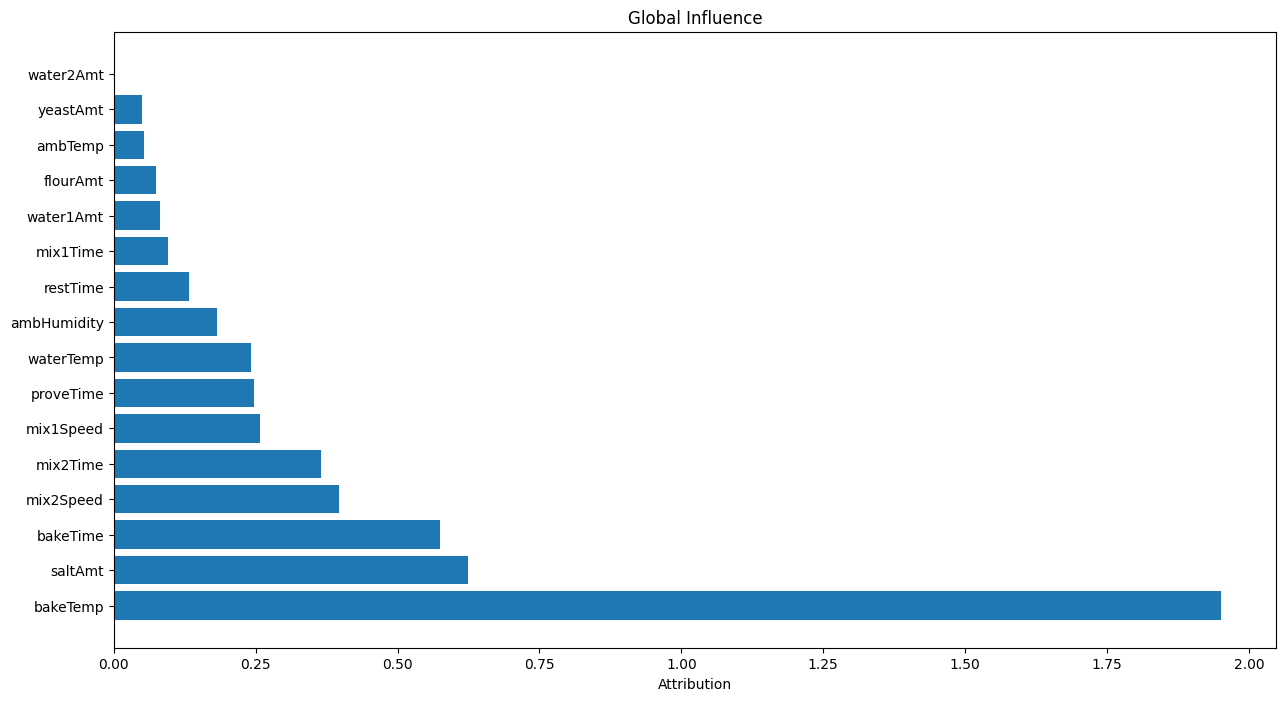

In [72]:
plt.figure(figsize=(15,8))
plt.barh(gexplain['feature'], gexplain['attribution'])
plt.title('Global Influence')
plt.xlabel('Attribution')
#plt.ylabel('Feature')
plt.show()

### Predictions With BigQuery ML (BQML)

Create a pandas dataframe with retrieved predictions for the test data (first 10 recipes) in the table using [ML.PREDICT](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-predict):

In [73]:
query = f"""
    SELECT Recipe, JUDGE_A, predicted_JUDGE_A, JUDGE_A-predicted_JUDGE_A as Error
    FROM ML.PREDICT (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`,(
        SELECT *
        FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe
"""
print(query)


    SELECT Recipe, JUDGE_A, predicted_JUDGE_A, JUDGE_A-predicted_JUDGE_A as Error
    FROM ML.PREDICT (MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_auto`,(
        SELECT *
        FROM `statmike-mlops-349915.feature_engineering.bread`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe



In [74]:
bq.query(query = query).to_dataframe()

,Recipe,JUDGE_A,predicted_JUDGE_A,Error
0,1,67.0,78.679902,-11.679902
1,2,81.0,74.661914,6.338086
2,3,63.0,74.376793,-11.376793
3,4,76.0,76.225022,-0.225022
4,5,57.0,81.141974,-24.141974
5,6,80.0,73.833110,6.166890
6,7,71.0,78.048941,-7.048941
7,8,85.0,77.994951,7.005049
8,9,77.0,73.119925,3.880075
9,10,86.0,74.445612,11.554388


### Local Explainability - What impacted the judges rating?

Retrieve feature attribution values to interpret each features contribution to a prediction relative to the baseline prediction using [ML.EXPLAIN_PREDICT](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-explain-predict).

In [75]:
query = f"""
    SELECT *
    FROM ML.EXPLAIN_PREDICT (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`,(
        SELECT *
        FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe
"""
print(query)


    SELECT *
    FROM ML.EXPLAIN_PREDICT (MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_auto`,(
        SELECT *
        FROM `statmike-mlops-349915.feature_engineering.bread`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe



In [76]:
explain = bq.query(query = query).to_dataframe()
explain

,predicted_JUDGE_A,top_feature_attributions,baseline_prediction_value,prediction_value,approximation_error,Recipe,flourAmt,saltAmt,yeastAmt,mix1Time,...,water2Amt,waterTemp,proveTime,restTime,bakeTime,bakeTemp,ambTemp,ambHumidity,JUDGE_A,JUDGE_B
0,78.679902,"[{'feature': 'bakeTemp', 'attribution': 2.0935...",75.260843,78.679902,0.0,1,497.653667,10,8,6,...,154.760677,49,97.656789,36,28,409.798183,61.812613,24.599715,67.0,54.0
1,74.661914,"[{'feature': 'bakeTemp', 'attribution': 1.9096...",75.260843,74.661914,0.0,2,498.896134,11,10,5,...,104.764913,44,98.061250,36,29,411.079681,45.124131,37.109838,81.0,72.0
2,74.376793,"[{'feature': 'bakeTemp', 'attribution': -3.435...",75.260843,74.376793,0.0,3,499.148669,10,10,4,...,123.540921,41,101.036741,38,29,448.329332,70.566656,51.204248,63.0,48.0
3,76.225022,"[{'feature': 'bakeTemp', 'attribution': 2.0523...",75.260843,76.225022,0.0,4,492.972374,9,9,6,...,114.369975,49,99.773276,36,26,410.085443,69.017800,40.497711,76.0,65.0
4,81.141974,"[{'feature': 'bakeTemp', 'attribution': 5.9394...",75.260843,81.141974,0.0,5,523.183916,9,11,4,...,92.490886,42,100.580615,42,27,382.998319,58.607860,62.926785,57.0,40.0
5,73.833110,"[{'feature': 'bakeTemp', 'attribution': -1.915...",75.260843,73.833110,0.0,6,500.624903,10,11,6,...,106.938983,42,95.026082,36,22,437.734810,64.187647,41.319957,80.0,71.0
6,78.048941,"[{'feature': 'bakeTemp', 'attribution': 3.8390...",75.260843,78.048941,0.0,7,493.567697,10,11,6,...,101.274937,44,97.712527,37,29,397.635143,56.730291,61.849543,71.0,59.0
7,77.994951,"[{'feature': 'mix1Time', 'attribution': 0.9434...",75.260843,77.994951,0.0,8,490.405017,9,9,3,...,108.808548,41,92.016182,45,25,426.975739,52.702558,47.944960,85.0,78.0
8,73.119925,"[{'feature': 'saltAmt', 'attribution': -1.5206...",75.260843,73.119925,0.0,9,480.119660,12,10,4,...,126.079875,46,110.620973,40,22,418.849566,54.659764,55.287793,77.0,66.0
9,74.445612,"[{'feature': 'bakeTemp', 'attribution': -0.890...",75.260843,74.445612,0.0,10,502.946563,10,10,6,...,93.776765,46,88.757280,36,25,430.588852,45.287481,53.689779,86.0,78.0


Create a plot of feature attributions for a single prediction:

In [77]:
recipe = 1
explanation = explain.iloc[recipe-1]['top_feature_attributions']

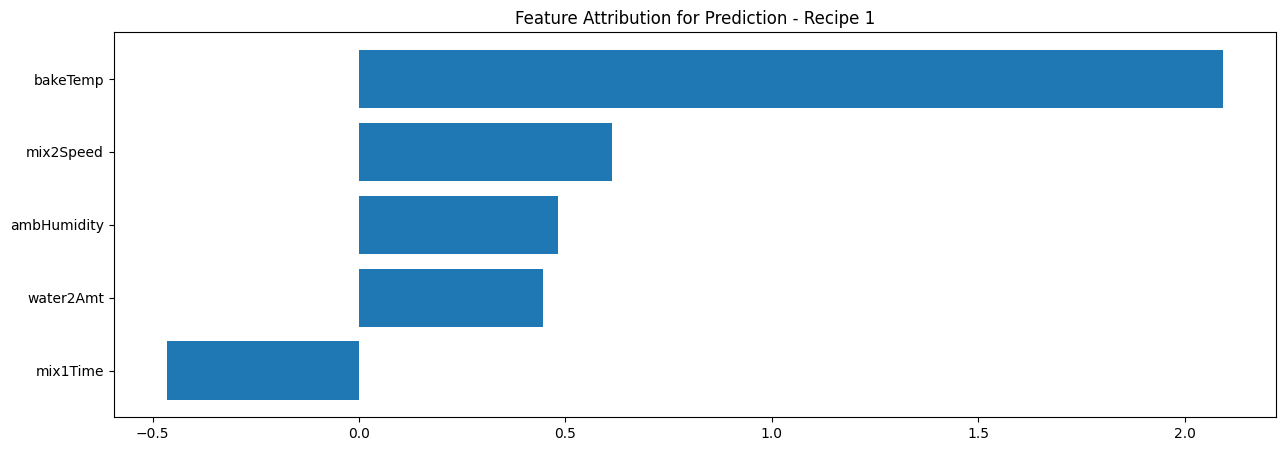

In [78]:
features = []
scores = []
for k in explanation:
    features.append(k['feature'])
    scores.append(k['attribution'])
features = [x for _, x in sorted(zip(scores, features))]
scores = sorted(scores)

plt.figure(figsize=(15,5))
plt.barh(features, scores)
plt.title(f'Feature Attribution for Prediction - Recipe {recipe}')
plt.show()

### Check out this model in the BigQuery Console:
- Make sure project selected is the one from this notebook
- Under Explore, expand this project and dataset
- Expand Models and select the model create here

In [79]:
print(f'Direct link to the model in BigQuery:\nhttps://console.cloud.google.com/bigquery?project={PROJECT_ID}&ws=!1m5!1m4!5m3!1s{PROJECT_ID}!2s{BQ_DATASET}!3s{BQ_MODEL_AUTO}')

Direct link to the model in BigQuery:
https://console.cloud.google.com/bigquery?project=statmike-mlops-349915&ws=!1m5!1m4!5m3!1sstatmike-mlops-349915!2sfeature_engineering!3s03_feature_engineering_auto


### Check out this model in the Vertex AI Console:
- Make sure project selected is the one from this notebook
- Make sure the region is `europe-west4` (default when BQ is `EU` multiregion)

In [80]:
print(f"View the model in the Vertex AI Console:\nhttps://console.cloud.google.com/vertex-ai/locations/{REGION}/models/bqml_{BQ_MODEL_AUTO}?project={PROJECT_ID}")

View the model in the Vertex AI Console:
https://console.cloud.google.com/vertex-ai/locations/us-central1/models/bqml_03_feature_engineering_auto?project=statmike-mlops-349915


## Serving

### Vertex AI Model Registry - Get Model

References:
- [aiplatform.Model()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.Model)

In [81]:
vertex_model_auto = aiplatform.Model(model_name = f'bqml_{BQ_MODEL_AUTO}')
vertex_model_auto.resource_name

'projects/1026793852137/locations/us-central1/models/bqml_03_feature_engineering_auto'

In [82]:
evaluation_name = vertex_model_auto.get_model_evaluation().resource_name
evaluation_name

'projects/1026793852137/locations/us-central1/models/bqml_03_feature_engineering_auto@1/evaluations/2121721575165132800'

In [83]:
aiplatform.ModelEvaluation(evaluation_name = evaluation_name).to_dict()

{'name': 'projects/1026793852137/locations/us-central1/models/bqml_03_feature_engineering_auto@1/evaluations/2121721575165132800',
 'metricsSchemaUri': 'gs://google-cloud-aiplatform/schema/modelevaluation/regression_metrics_1.0.0.yaml',
 'metrics': {'meanAbsoluteError': 7.13784,
  'rSquared': 0.038250636,
  'rootMeanSquaredError': 8.947347,
  'rootMeanSquaredLogError': 0.12548275},
 'createTime': '2023-06-21T15:25:51.853707Z'}

In [84]:
vertex_model_auto.uri

### Vertex AI Endpoint - Create or Retrieve

References:
- [aiplatform.Endpoint()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.Endpoint)

In [85]:
if not aiplatform.Endpoint.list(filter = f"display_name={SERIES}_{EXPERIMENT}_auto"):
    endpoint_auto = aiplatform.Endpoint.create(
        display_name = f"{SERIES}_{EXPERIMENT}_auto",
        labels = {'series' : f"{SERIES}"}
    )
    print(f"Endpoint Created: {endpoint_auto.display_name}")
else: endpoint_auto = aiplatform.Endpoint.list(filter = f"display_name={SERIES}_{EXPERIMENT}_auto")[0]

Creating Endpoint
Create Endpoint backing LRO: projects/1026793852137/locations/us-central1/endpoints/6078975489601437696/operations/5221494065048059904
Endpoint created. Resource name: projects/1026793852137/locations/us-central1/endpoints/6078975489601437696
To use this Endpoint in another session:
endpoint = aiplatform.Endpoint('projects/1026793852137/locations/us-central1/endpoints/6078975489601437696')
Endpoint Created: 03_feature_engineering_auto


In [86]:
endpoint_auto.display_name

'03_feature_engineering_auto'

In [87]:
endpoint_auto.traffic_split

{}

In [88]:
deployed_models = endpoint_auto.list_models()
deployed_models

[]

### Deploy Model To Vertex AI Endpoint

**NOTE: This can take 15+ minutes to complete.**

In [89]:
endpoint_auto.deploy(
    model = vertex_model_auto,
    deployed_model_display_name = vertex_model_auto.display_name,
    traffic_percentage = 100,
    machine_type = 'n1-standard-2',
    min_replica_count = 1,
    max_replica_count = 1
)

Deploying Model projects/1026793852137/locations/us-central1/models/bqml_03_feature_engineering_auto to Endpoint : projects/1026793852137/locations/us-central1/endpoints/6078975489601437696
Deploy Endpoint model backing LRO: projects/1026793852137/locations/us-central1/endpoints/6078975489601437696/operations/8133071224143085568
Endpoint model deployed. Resource name: projects/1026793852137/locations/us-central1/endpoints/6078975489601437696


In [90]:
endpoint_auto.list_models()

[id: "6655847459253649408"
 model: "projects/1026793852137/locations/us-central1/models/bqml_03_feature_engineering_auto"
 display_name: "bqml_03_feature_engineering_auto"
 create_time {
   seconds: 1687361173
   nanos: 282321000
 }
 dedicated_resources {
   machine_spec {
     machine_type: "n1-standard-2"
   }
   min_replica_count: 1
   max_replica_count: 1
 }
 disable_container_logging: true
 model_version_id: "1"]

---
## Prediction

### Retrieve Records For Prediction
The first 10 recipes.

In [91]:
n = 10
pred = bq.query(
    query = f"""
        SELECT * EXCEPT(JUDGE_B)
        FROM {BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}
        WHERE Recipe <= 10
        ORDER BY Recipe
    """
).to_dataframe()

In [92]:
pred

,Recipe,flourAmt,saltAmt,yeastAmt,mix1Time,mix1Speed,mix2Time,mix2Speed,water1Amt,water2Amt,waterTemp,proveTime,restTime,bakeTime,bakeTemp,ambTemp,ambHumidity,JUDGE_A
0,1,497.653667,10,8,6,3,6,4,320.903454,154.760677,49,97.656789,36,28,409.798183,61.812613,24.599715,67.0
1,2,498.896134,11,10,5,4,5,6,294.907489,104.764913,44,98.061250,36,29,411.079681,45.124131,37.109838,81.0
2,3,499.148669,10,10,4,4,7,5,358.745436,123.540921,41,101.036741,38,29,448.329332,70.566656,51.204248,63.0
3,4,492.972374,9,9,6,4,4,6,347.921558,114.369975,49,99.773276,36,26,410.085443,69.017800,40.497711,76.0
4,5,523.183916,9,11,4,4,5,5,329.234385,92.490886,42,100.580615,42,27,382.998319,58.607860,62.926785,57.0
5,6,500.624903,10,11,6,3,7,5,320.498138,106.938983,42,95.026082,36,22,437.734810,64.187647,41.319957,80.0
6,7,493.567697,10,11,6,2,5,4,330.416212,101.274937,44,97.712527,37,29,397.635143,56.730291,61.849543,71.0
7,8,490.405017,9,9,3,3,7,4,370.472110,108.808548,41,92.016182,45,25,426.975739,52.702558,47.944960,85.0
8,9,480.119660,12,10,4,4,5,6,332.241730,126.079875,46,110.620973,40,22,418.849566,54.659764,55.287793,77.0
9,10,502.946563,10,10,6,2,7,4,348.006773,93.776765,46,88.757280,36,25,430.588852,45.287481,53.689779,86.0


Shape as instances: dictionaries of key:value pairs for only features used in model

In [93]:
newobs = pred[pred.columns[~pred.columns.isin(['JUDGE_A', 'Recipe'])]].to_dict(orient='records')

In [94]:
newobs[0]

{'flourAmt': 497.65366727027174,
 'saltAmt': 10,
 'yeastAmt': 8,
 'mix1Time': 6,
 'mix1Speed': 3,
 'mix2Time': 6,
 'mix2Speed': 4,
 'water1Amt': 320.90345406268847,
 'water2Amt': 154.7606766243992,
 'waterTemp': 49,
 'proveTime': 97.65678893192006,
 'restTime': 36,
 'bakeTime': 28,
 'bakeTemp': 409.7981826922043,
 'ambTemp': 61.81261292624964,
 'ambHumidity': 24.59971473082628}

In [95]:
instances = [json_format.ParseDict(newob, Value()) for newob in newobs]

In [96]:
len(instances)

10

### Get Predictions: Python Client

In [97]:
prediction = endpoint_auto.predict(instances = instances)
prediction.predictions[0]

[78.67990162908798]

In [98]:
prediction.predictions

[[78.67990162908798],
 [74.66191438283916],
 [74.3767911755266],
 [76.22502129655959],
 [81.14197357997809],
 [73.8331107077718],
 [78.04894237542965],
 [77.99495146603634],
 [73.11992354925482],
 [74.44561362902371]]

#### Compare to BigQuery ML.PREDICT Results:

In [99]:
query = f"""
    SELECT Recipe, JUDGE_A, predicted_JUDGE_A, JUDGE_A-predicted_JUDGE_A as Error
    FROM ML.PREDICT (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`,(
        SELECT *
        FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe
"""
bq.query(query = query).to_dataframe()

,Recipe,JUDGE_A,predicted_JUDGE_A,Error
0,1,67.0,78.679902,-11.679902
1,2,81.0,74.661914,6.338086
2,3,63.0,74.376793,-11.376793
3,4,76.0,76.225022,-0.225022
4,5,57.0,81.141974,-24.141974
5,6,80.0,73.833110,6.166890
6,7,71.0,78.048941,-7.048941
7,8,85.0,77.994951,7.005049
8,9,77.0,73.119925,3.880075
9,10,86.0,74.445612,11.554388


---
# Feature Engineering With Inline TRANSFORM Clause

## Train Model

Use BigQuery ML to train a boosted tree:
- [Boosted Tree](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create-boosted-tree) with BigQuery ML (BQML)

Feature preprocessing with the `TRANSFORM` clause:
- [TRANSFORM](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create#transform)

Register the model to Vertex AI Model Registry:
- `MODEL_REGISTRY` [training options](https://cloud.google.com/bigquery-ml/docs/create_vertex) to register the resulting model in the [Vertex AI Model Registry](https://cloud.google.com/vertex-ai/docs/model-registry/introduction).

In [100]:
TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")
RUN_NAME = f'run-{TIMESTAMP}'
BQ_MODEL_TRANSFORM = f'{SERIES}_{EXPERIMENT}_transform'

In [101]:
query = f"""
CREATE OR REPLACE MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`
TRANSFORM (
    JUDGE_A,

    ML.MIN_MAX_SCALER(flourAmt) OVER() as scale_flourAmt, 
    ML.ROBUST_SCALER(saltAmt) OVER() as scale_saltAmt,
    ML.MAX_ABS_SCALER(yeastAmt) OVER() as scale_yeastAmt,
    ML.STANDARD_SCALER(water1Amt) OVER() as scale_water1Amt,
    ML.STANDARD_SCALER(water2Amt) OVER() as scale_water2Amt,

    ML.STANDARD_SCALER(waterTemp) OVER() as scale_waterTemp,
    ML.ROBUST_SCALER(bakeTemp) OVER() as scale_bakeTemp,
    ML.MIN_MAX_SCALER(ambTemp) OVER() as scale_ambTemp,
    ML.MAX_ABS_SCALER(ambHumidity) OVER() as scale_ambHumidity,

    ML.ROBUST_SCALER(mix1Time) OVER() as scale_mix1Time,
    ML.ROBUST_SCALER(mix2Time) OVER() as scale_mix2Time,
    ML.ROBUST_SCALER(mix1Speed) OVER() as scale_mix1Speed,
    ML.ROBUST_SCALER(mix2Speed) OVER() as scale_mix2Speed,
    ML.STANDARD_SCALER(proveTime) OVER() as scale_proveTime,
    ML.MAX_ABS_SCALER(restTime) OVER() as scale_restTime,
    ML.MAX_ABS_SCALER(bakeTime) OVER() as scale_bakeTime
)
OPTIONS (
        model_type = 'BOOSTED_TREE_REGRESSOR',
        booster_type = 'GBTREE',
        num_parallel_tree = 25,
        early_stop = TRUE,
        min_rel_progress = 0.01,
        tree_method = 'HIST',
        subsample = 0.85,
        #model_type = 'LINEAR_REG',        
        input_label_cols = ['JUDGE_A'],
        enable_global_explain = TRUE,
        data_split_method = 'AUTO_SPLIT',
        l1_reg = 10,
        l2_reg = 10,
        MODEL_REGISTRY = 'VERTEX_AI',
        VERTEX_AI_MODEL_ID = 'bqml_{BQ_MODEL_TRANSFORM}',
        VERTEX_AI_MODEL_VERSION_ALIASES = ['{RUN_NAME}']
    ) AS
SELECT * EXCEPT(Recipe, JUDGE_B)
FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
"""
print(query)


CREATE OR REPLACE MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_transform`
TRANSFORM (
    JUDGE_A,

    ML.MIN_MAX_SCALER(flourAmt) OVER() as scale_flourAmt, 
    ML.ROBUST_SCALER(saltAmt) OVER() as scale_saltAmt,
    ML.MAX_ABS_SCALER(yeastAmt) OVER() as scale_yeastAmt,
    ML.STANDARD_SCALER(water1Amt) OVER() as scale_water1Amt,
    ML.STANDARD_SCALER(water2Amt) OVER() as scale_water2Amt,

    ML.STANDARD_SCALER(waterTemp) OVER() as scale_waterTemp,
    ML.ROBUST_SCALER(bakeTemp) OVER() as scale_bakeTemp,
    ML.MIN_MAX_SCALER(ambTemp) OVER() as scale_ambTemp,
    ML.MAX_ABS_SCALER(ambHumidity) OVER() as scale_ambHumidity,

    ML.ROBUST_SCALER(mix1Time) OVER() as scale_mix1Time,
    ML.ROBUST_SCALER(mix2Time) OVER() as scale_mix2Time,
    ML.ROBUST_SCALER(mix1Speed) OVER() as scale_mix1Speed,
    ML.ROBUST_SCALER(mix2Speed) OVER() as scale_mix2Speed,
    ML.STANDARD_SCALER(proveTime) OVER() as scale_proveTime,
    ML.MAX_ABS_SCALER(restTime) OVER() as sca

In [102]:
job = bq.query(query = query)
job.result()
(job.ended-job.started).total_seconds()

526.269

In [103]:
job.total_bytes_processed

34725941734

Add labels to the model in BigQuery:

In [104]:
bqml_model_transform = bq.get_model(f'{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}')
bqml_model_transform.labels = {'series' : f'{SERIES}', 'experiment' : f'{EXPERIMENT}'}
bqml_model_transform = bq.update_model(bqml_model_transform, ['labels'])

### Feature and Training Review

Review the Model Inputs, the feature information before preprocessing, with [ML.FEATURE_INFO](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-feature):

In [105]:
query = f"""
    SELECT *
    FROM ML.FEATURE_INFO(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`)
"""
print(query)


    SELECT *
    FROM ML.FEATURE_INFO(MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_transform`)



In [106]:
bq.query(query = query).to_dataframe()

,input,min,max,mean,median,stddev,category_count,null_count,dimension
0,ambHumidity,17.222334,84.174949,50.194717,50.218754,10.180430,<NA>,0,<NA>
1,water2Amt,47.718380,185.141560,110.403007,110.571710,19.812930,<NA>,0,<NA>
2,ambTemp,26.519930,98.676478,59.892889,59.831760,9.960117,<NA>,0,<NA>
3,mix2Speed,4.000000,6.000000,5.002460,5.000000,0.710359,<NA>,0,<NA>
4,saltAmt,8.000000,12.000000,10.011070,10.000000,1.216249,<NA>,0,<NA>
5,proveTime,84.356559,116.873081,99.829747,99.881445,5.003812,<NA>,0,<NA>
6,mix2Time,4.000000,8.000000,6.007995,6.000000,1.218043,<NA>,0,<NA>
7,bakeTemp,372.216319,494.115652,424.733760,424.389160,15.242977,<NA>,0,<NA>
8,mix1Speed,2.000000,5.000000,3.486470,3.000000,0.962753,<NA>,0,<NA>
9,bakeTime,20.000000,30.000000,24.951415,25.000000,2.916390,<NA>,0,<NA>


Review the iterations from training with [ML.TRAINING_INFO](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-train):

In [107]:
query = f"""
    SELECT *
    FROM ML.TRAINING_INFO(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`)
    ORDER BY iteration
"""
print(query)


    SELECT *
    FROM ML.TRAINING_INFO(MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_transform`)
    ORDER BY iteration



In [108]:
history = bq.query(query = query).to_dataframe()
history

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,1,52.93630,52.08400,0.3,91951
1,0,2,37.64060,36.84880,0.3,69
2,0,3,26.93830,26.15150,0.3,78
3,0,4,19.48630,18.76980,0.3,62
4,0,5,14.27190,13.61350,0.3,64
5,0,6,10.63340,10.20000,0.3,59
6,0,7,8.10675,7.90415,0.3,69
7,0,8,6.34967,6.35560,0.3,15370
8,0,9,5.10065,5.34130,0.3,158
9,0,10,4.21729,4.66780,0.3,78


Plot the loss history:

<AxesSubplot:xlabel='iteration'>

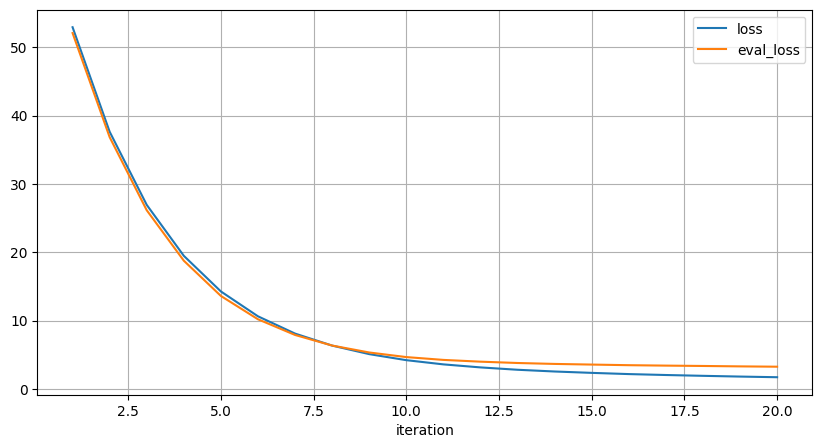

In [109]:
history.plot(x = 'iteration', y = ['loss','eval_loss'], figsize = (10, 5), grid = True)

### Model Metrics Review

Review the model evaluation statistics with [ML.EVALUATE](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-evaluate):

In [110]:
query = f"""
    SELECT * FROM ML.EVALUATE(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`)
"""
print(query)


    SELECT * FROM ML.EVALUATE(MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_transform`)



In [111]:
bq.query(query = query).to_dataframe()

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,2.36459,9.331377,0.002274,2.006508,0.912498,0.912733


### Comparing Metrics Between Automatic and Manual Feature Engineering

The query here loads the metrics with `ML.EVALUATE` for both models.

In [112]:
query = f"""
    SELECT 'Automatic Feature Engineering' as Approach, * FROM ML.EVALUATE(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`)
    UNION ALL
    SELECT 'Feature Engineering With Inline TRANSFORM' as Approach, * FROM ML.EVALUATE(MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`)
"""
print(query)


    SELECT 'Automatic Feature Engineering' as Approach, * FROM ML.EVALUATE(MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_auto`)
    UNION ALL
    SELECT 'Feature Engineering With Inline TRANSFORM' as Approach, * FROM ML.EVALUATE(MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_transform`)



In [113]:
bq.query(query = query).to_dataframe()

,Approach,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,Automatic Feature Engineering,7.526567,97.032748,0.022136,5.894421,0.090110,0.097917
1,Feature Engineering With Inline TRANSFORM,2.364590,9.331377,0.002274,2.006508,0.912498,0.912733


The results show a vast improvement in all metrics.  This is mostly because the relationship between the features and the target was created to have covariance that is best explained by higher order terms.  Fitting the model with a non-linear approach, like a boosted tree (`model_type = BOOSTED_TREE_REGRESSOR`), would also better understand the relationships in these data.

### Feature Importance

Retrieve the [XGBoost feature importances](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor.feature_importances_) for the model using [ML.FEATURE_IMPORTANCE](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-importance).
- importance_weight: the number of splits the feature was used in across all trees
- importance_gain: the improvement in accuracy due to splits using the feature
- importance_cover: the number of rows of data covered by splits using the feature

In [114]:
query = f"""
    SELECT *
    FROM ML.FEATURE_IMPORTANCE (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`)
    ORDER BY importance_gain DESC
"""
print(query)


    SELECT *
    FROM ML.FEATURE_IMPORTANCE (MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_transform`)
    ORDER BY importance_gain DESC



In [115]:
feature_importance = bq.query(query = query).to_dataframe()
feature_importance

,feature,importance_weight,importance_gain,importance_cover
0,scale_bakeTemp,2774,565.958815,308.468277
1,scale_water2Amt,2277,205.693715,259.554238
2,scale_bakeTime,1471,113.281676,222.191706
3,scale_mix2Time,590,102.079359,309.216949
4,scale_yeastAmt,898,99.044694,325.025612
5,scale_mix1Time,866,68.420530,260.724018
6,scale_flourAmt,2092,65.833616,183.228489
7,scale_mix2Speed,302,50.512393,331.519868
8,scale_saltAmt,615,30.528416,137.941463
9,scale_restTime,763,27.537822,150.585845


### Global Explainability - What is important to Judges?

Retrieve the influence of each feature on the model with [ML.GLOBAL_EXPLAIN](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-global-explain).  

In [116]:
query = f"""
    SELECT *
    FROM ML.GLOBAL_EXPLAIN (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`)
"""
print(query)


    SELECT *
    FROM ML.GLOBAL_EXPLAIN (MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_transform`)



In [117]:
gexplain = bq.query(query = query).to_dataframe()
gexplain

,feature,attribution
0,scale_bakeTemp,6.277062
1,scale_water2Amt,2.595406
2,scale_bakeTime,1.114984
3,scale_flourAmt,1.004529
4,scale_mix2Time,0.695363
5,scale_yeastAmt,0.691773
6,scale_mix1Time,0.450873
7,scale_mix2Speed,0.237933
8,scale_saltAmt,0.196091
9,scale_restTime,0.186976


Plot the attribution:

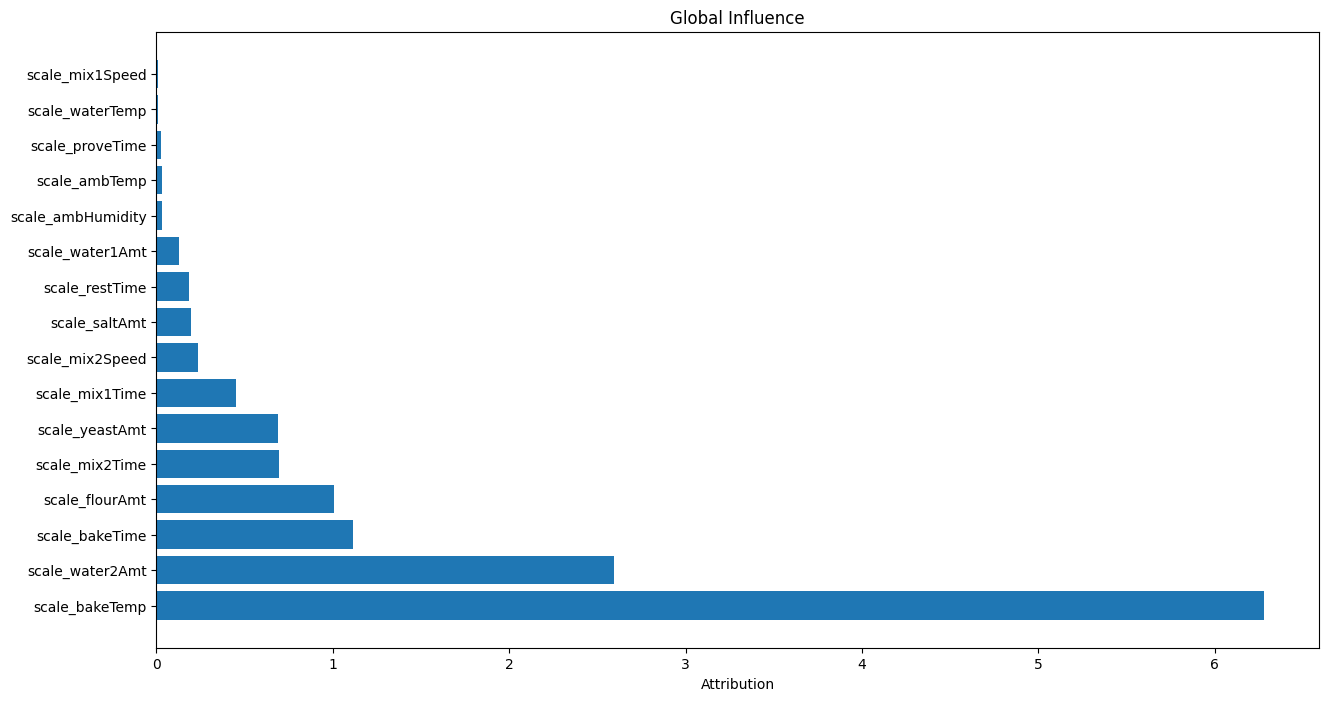

In [118]:
plt.figure(figsize=(15,8))
plt.barh(gexplain['feature'], gexplain['attribution'])
plt.title('Global Influence')
plt.xlabel('Attribution')
#plt.ylabel('Feature')
plt.show()

### Predictions With BigQuery ML (BQML)

Create a pandas dataframe with retrieved predictions for the test data in the table using [ML.PREDICT](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-predict):

In [119]:
query = f"""
    SELECT Recipe, JUDGE_A, predicted_JUDGE_A, JUDGE_A-predicted_JUDGE_A as Error
    FROM ML.PREDICT (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`,(
        SELECT *
        FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe
"""
print(query)


    SELECT Recipe, JUDGE_A, predicted_JUDGE_A, JUDGE_A-predicted_JUDGE_A as Error
    FROM ML.PREDICT (MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_transform`,(
        SELECT *
        FROM `statmike-mlops-349915.feature_engineering.bread`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe



In [120]:
bq.query(query = query).to_dataframe()

,Recipe,JUDGE_A,predicted_JUDGE_A,Error
0,1,67.0,67.211510,-0.211510
1,2,81.0,80.786530,0.213470
2,3,63.0,62.556980,0.443020
3,4,76.0,77.471687,-1.471687
4,5,57.0,56.580448,0.419552
5,6,80.0,79.489357,0.510643
6,7,71.0,69.679268,1.320732
7,8,85.0,85.045792,-0.045792
8,9,77.0,76.978699,0.021301
9,10,86.0,84.083557,1.916443


### Local Explainability - What impacted the judges rating?

Retrieve feature attribution values to interpret each features contribution to a prediction relative to the baseline prediction using [ML.EXPLAIN_PREDICT](https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-explain-predict).

In [121]:
query = f"""
    SELECT *
    FROM ML.EXPLAIN_PREDICT (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`,(
        SELECT *
        FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe
"""
print(query)


    SELECT *
    FROM ML.EXPLAIN_PREDICT (MODEL `statmike-mlops-349915.feature_engineering.03_feature_engineering_transform`,(
        SELECT *
        FROM `statmike-mlops-349915.feature_engineering.bread`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe



In [122]:
explain = bq.query(query = query).to_dataframe()
explain

,predicted_JUDGE_A,top_feature_attributions,baseline_prediction_value,prediction_value,approximation_error,Recipe,flourAmt,saltAmt,yeastAmt,mix1Time,...,water2Amt,waterTemp,proveTime,restTime,bakeTime,bakeTemp,ambTemp,ambHumidity,JUDGE_A,JUDGE_B
0,67.211510,"[{'feature': 'scale_water2Amt', 'attribution':...",75.191727,67.211550,0.0,1,497.653667,10,8,6,...,154.760677,49,97.656789,36,28,409.798183,61.812613,24.599715,67.0,54.0
1,80.786530,"[{'feature': 'scale_water2Amt', 'attribution':...",75.191727,80.786562,0.0,2,498.896134,11,10,5,...,104.764913,44,98.061250,36,29,411.079681,45.124131,37.109838,81.0,72.0
2,62.556980,"[{'feature': 'scale_bakeTemp', 'attribution': ...",75.191727,62.556991,0.0,3,499.148669,10,10,4,...,123.540921,41,101.036741,38,29,448.329332,70.566656,51.204248,63.0,48.0
3,77.471687,"[{'feature': 'scale_water2Amt', 'attribution':...",75.191727,77.471702,0.0,4,492.972374,9,9,6,...,114.369975,49,99.773276,36,26,410.085443,69.017800,40.497711,76.0,65.0
4,56.580448,"[{'feature': 'scale_bakeTemp', 'attribution': ...",75.191727,56.580460,0.0,5,523.183916,9,11,4,...,92.490886,42,100.580615,42,27,382.998319,58.607860,62.926785,57.0,40.0
5,79.489357,"[{'feature': 'scale_water2Amt', 'attribution':...",75.191727,79.489419,0.0,6,500.624903,10,11,6,...,106.938983,42,95.026082,36,22,437.734810,64.187647,41.319957,80.0,71.0
6,69.679268,"[{'feature': 'scale_bakeTemp', 'attribution': ...",75.191727,69.679249,0.0,7,493.567697,10,11,6,...,101.274937,44,97.712527,37,29,397.635143,56.730291,61.849543,71.0,59.0
7,85.045792,"[{'feature': 'scale_bakeTemp', 'attribution': ...",75.191727,85.045769,0.0,8,490.405017,9,9,3,...,108.808548,41,92.016182,45,25,426.975739,52.702558,47.944960,85.0,78.0
8,76.978699,"[{'feature': 'scale_bakeTemp', 'attribution': ...",75.191727,76.978752,0.0,9,480.119660,12,10,4,...,126.079875,46,110.620973,40,22,418.849566,54.659764,55.287793,77.0,66.0
9,84.083557,"[{'feature': 'scale_bakeTemp', 'attribution': ...",75.191727,84.083557,0.0,10,502.946563,10,10,6,...,93.776765,46,88.757280,36,25,430.588852,45.287481,53.689779,86.0,78.0


Create a plot of feature attributions for a single prediction:

In [123]:
recipe = 1
explanation = explain.iloc[recipe-1]['top_feature_attributions']

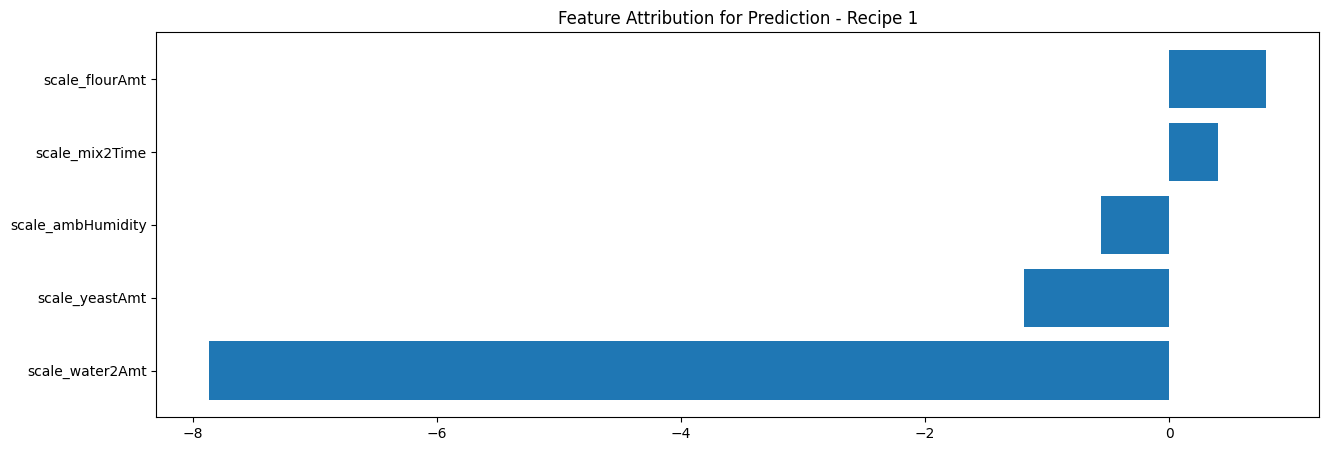

In [124]:
features = []
scores = []
for k in explanation:
    features.append(k['feature'])
    scores.append(k['attribution'])
features = [x for _, x in sorted(zip(scores, features))]
scores = sorted(scores)

plt.figure(figsize=(15,5))
plt.barh(features, scores)
plt.title(f'Feature Attribution for Prediction - Recipe {recipe}')
plt.show()

### Check out this model in the BigQuery Console:
- Make sure project selected is the one from this notebook
- Under Explore, expand this project and dataset
- Expand Models and select the model create here

In [125]:
print(f'Direct link to the model in BigQuery:\nhttps://console.cloud.google.com/bigquery?project={PROJECT_ID}&ws=!1m5!1m4!5m3!1s{PROJECT_ID}!2s{BQ_DATASET}!3s{BQ_MODEL_TRANSFORM}')

Direct link to the model in BigQuery:
https://console.cloud.google.com/bigquery?project=statmike-mlops-349915&ws=!1m5!1m4!5m3!1sstatmike-mlops-349915!2sfeature_engineering!3s03_feature_engineering_transform


### Check out this model in the Vertex AI Console:
- Make sure project selected is the one from this notebook
- Make sure the region is `europe-west4` (default when BQ is `EU` multiregion)

In [126]:
print(f"View the model in the Vertex AI Console:\nhttps://console.cloud.google.com/vertex-ai/locations/{REGION}/models/bqml_{BQ_MODEL_TRANSFORM}?project={PROJECT_ID}")

View the model in the Vertex AI Console:
https://console.cloud.google.com/vertex-ai/locations/us-central1/models/bqml_03_feature_engineering_transform?project=statmike-mlops-349915


---
## Serving

**Notes on Serving With Manual Feature Engineering**

When this model was trained it also registered to Vertex AI Model Registry.  With the inline TRANSFORM statement the resulting model is also directly servable even though it is actually 2 models, a preprocessing model that represents the `TRANSFORM` clause, and a model that serves responses from the inputs shaped by the preprocessing.  When deployed the models and pipelined together on the same endpoint.  As long as the `TRANSFORM` statement used [suppored SQL functions](https://cloud.google.com/bigquery/docs/exporting-models#export-transform-functions) this will works.

### Vertex AI Model Registry - Get Models

When these modes were trained in BigQuery ML they included options for registration in Vertex AI Model Registry.  This section shows how to retrieve the information from the model unsing Vetex AI.

References:
- [aiplatform.Model()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.Model)

In [127]:
vertex_model_transform = aiplatform.Model(model_name = f'bqml_{BQ_MODEL_TRANSFORM}')
vertex_model_transform.resource_name

'projects/1026793852137/locations/us-central1/models/bqml_03_feature_engineering_transform'

In [128]:
aiplatform.ModelEvaluation(
    evaluation_name = vertex_model_transform.get_model_evaluation().resource_name
).to_dict()

{'name': 'projects/1026793852137/locations/us-central1/models/bqml_03_feature_engineering_transform@1/evaluations/2800797548665634816',
 'metricsSchemaUri': 'gs://google-cloud-aiplatform/schema/modelevaluation/regression_metrics_1.0.0.yaml',
 'metrics': {'rootMeanSquaredLogError': 0.038172837,
  'rSquared': 0.9133922,
  'meanAbsoluteError': 2.0918958,
  'rootMeanSquaredError': 2.684985},
 'createTime': '2023-06-21T15:47:53.965520Z'}

In [129]:
# note: this is blank since the model is in two parts which are managed in a single container at deployment, see export below:
vertex_model_transform.uri 

### Vertex AI Endpoint - Create or Retrieve

References:
- [aiplatform.Endpoint()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.Endpoint)

In [130]:
if not aiplatform.Endpoint.list(filter = f"display_name={SERIES}_{EXPERIMENT}_transform"):
    endpoint_transform = aiplatform.Endpoint.create(
        display_name = f"{SERIES}_{EXPERIMENT}_transform",
        labels = {'series' : f"{SERIES}"}
    )
    print(f"Endpoint Created: {endpoint_transform.display_name}")
else: endpoint_transform = aiplatform.Endpoint.list(filter = f"display_name={SERIES}_{EXPERIMENT}_transform")[0]

Creating Endpoint
Create Endpoint backing LRO: projects/1026793852137/locations/us-central1/endpoints/5391613596474015744/operations/6782835760862068736
Endpoint created. Resource name: projects/1026793852137/locations/us-central1/endpoints/5391613596474015744
To use this Endpoint in another session:
endpoint = aiplatform.Endpoint('projects/1026793852137/locations/us-central1/endpoints/5391613596474015744')
Endpoint Created: 03_feature_engineering_auto


In [131]:
endpoint_transform.display_name

'03_feature_engineering_transform'

In [132]:
endpoint_transform.traffic_split

{}

In [133]:
deployed_models = endpoint_transform.list_models()
deployed_models

[]

### Deploy Model To Vertex AI Endpoint

**NOTE: This can take 15+ minutes to complete.**

In [134]:
endpoint_transform.deploy(
    model = vertex_model_transform,
    deployed_model_display_name = vertex_model_transform.display_name,
    traffic_percentage = 100,
    machine_type = 'n1-standard-2',
    min_replica_count = 1,
    max_replica_count = 1
)

Deploying Model projects/1026793852137/locations/us-central1/models/bqml_03_feature_engineering_transform to Endpoint : projects/1026793852137/locations/us-central1/endpoints/5391613596474015744
Deploy Endpoint model backing LRO: projects/1026793852137/locations/us-central1/endpoints/5391613596474015744/operations/2036041753613565952
Endpoint model deployed. Resource name: projects/1026793852137/locations/us-central1/endpoints/5391613596474015744


In [135]:
endpoint_transform.list_models()

[id: "2488891904029097984"
 model: "projects/1026793852137/locations/us-central1/models/bqml_03_feature_engineering_transform"
 display_name: "bqml_03_feature_engineering_transform"
 create_time {
   seconds: 1687362493
   nanos: 237560000
 }
 dedicated_resources {
   machine_spec {
     machine_type: "n1-standard-2"
   }
   min_replica_count: 1
   max_replica_count: 1
 }
 explanation_spec {
   parameters {
     sampled_shapley_attribution {
       path_count: 5
     }
   }
   metadata {
     inputs {
       key: "ambHumidity"
       value {
       }
     }
     inputs {
       key: "ambTemp"
       value {
       }
     }
     inputs {
       key: "bakeTemp"
       value {
       }
     }
     inputs {
       key: "bakeTime"
       value {
       }
     }
     inputs {
       key: "flourAmt"
       value {
       }
     }
     inputs {
       key: "mix1Speed"
       value {
       }
     }
     inputs {
       key: "mix1Time"
       value {
       }
     }
     inputs {
       key: "m

---
## Prediction

### Retrieve Records For Prediction
The first 10 recipes.

In [136]:
n = 10
pred = bq.query(
    query = f"""
        SELECT * EXCEPT(JUDGE_B)
        FROM {BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}
        WHERE Recipe <= 10
        ORDER BY Recipe
    """
).to_dataframe()

In [137]:
pred

,Recipe,flourAmt,saltAmt,yeastAmt,mix1Time,mix1Speed,mix2Time,mix2Speed,water1Amt,water2Amt,waterTemp,proveTime,restTime,bakeTime,bakeTemp,ambTemp,ambHumidity,JUDGE_A
0,1,497.653667,10,8,6,3,6,4,320.903454,154.760677,49,97.656789,36,28,409.798183,61.812613,24.599715,67.0
1,2,498.896134,11,10,5,4,5,6,294.907489,104.764913,44,98.061250,36,29,411.079681,45.124131,37.109838,81.0
2,3,499.148669,10,10,4,4,7,5,358.745436,123.540921,41,101.036741,38,29,448.329332,70.566656,51.204248,63.0
3,4,492.972374,9,9,6,4,4,6,347.921558,114.369975,49,99.773276,36,26,410.085443,69.017800,40.497711,76.0
4,5,523.183916,9,11,4,4,5,5,329.234385,92.490886,42,100.580615,42,27,382.998319,58.607860,62.926785,57.0
5,6,500.624903,10,11,6,3,7,5,320.498138,106.938983,42,95.026082,36,22,437.734810,64.187647,41.319957,80.0
6,7,493.567697,10,11,6,2,5,4,330.416212,101.274937,44,97.712527,37,29,397.635143,56.730291,61.849543,71.0
7,8,490.405017,9,9,3,3,7,4,370.472110,108.808548,41,92.016182,45,25,426.975739,52.702558,47.944960,85.0
8,9,480.119660,12,10,4,4,5,6,332.241730,126.079875,46,110.620973,40,22,418.849566,54.659764,55.287793,77.0
9,10,502.946563,10,10,6,2,7,4,348.006773,93.776765,46,88.757280,36,25,430.588852,45.287481,53.689779,86.0


Shape as instances: dictionaries of key:value pairs for only features used in model

In [138]:
newobs = pred[pred.columns[~pred.columns.isin(['JUDGE_A', 'Recipe'])]].to_dict(orient='records')

In [139]:
newobs[0]

{'flourAmt': 497.65366727027174,
 'saltAmt': 10,
 'yeastAmt': 8,
 'mix1Time': 6,
 'mix1Speed': 3,
 'mix2Time': 6,
 'mix2Speed': 4,
 'water1Amt': 320.90345406268847,
 'water2Amt': 154.7606766243992,
 'waterTemp': 49,
 'proveTime': 97.65678893192006,
 'restTime': 36,
 'bakeTime': 28,
 'bakeTemp': 409.7981826922043,
 'ambTemp': 61.81261292624964,
 'ambHumidity': 24.59971473082628}

In [140]:
instances = [json_format.ParseDict(newob, Value()) for newob in newobs]

In [141]:
len(instances)

10

### Get Predictions: Python Client

In [142]:
prediction = endpoint_transform.predict(instances = instances)
prediction.predictions[0]

67.21149444580078

In [143]:
prediction.predictions

[67.21149444580078,
 80.78654479980469,
 62.55698013305664,
 77.47169494628906,
 56.58044815063477,
 79.4893569946289,
 69.67926788330078,
 85.04579162597656,
 76.97869873046875,
 84.08355712890625]

#### Compare to BigQuery ML.PREDICT Results:

In [146]:
query = f"""
    SELECT Recipe, JUDGE_A, predicted_JUDGE_A, JUDGE_A-predicted_JUDGE_A as Error
    FROM ML.PREDICT (MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`,(
        SELECT *
        FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
        WHERE Recipe <= 10)
    )
    ORDER BY Recipe
"""
bq.query(query = query).to_dataframe()

,Recipe,JUDGE_A,predicted_JUDGE_A,Error
0,1,67.0,67.211510,-0.211510
1,2,81.0,80.786530,0.213470
2,3,63.0,62.556980,0.443020
3,4,76.0,77.471687,-1.471687
4,5,57.0,56.580448,0.419552
5,6,80.0,79.489357,0.510643
6,7,71.0,69.679268,1.320732
7,8,85.0,85.045792,-0.045792
8,9,77.0,76.978699,0.021301
9,10,86.0,84.083557,1.916443


---
# Model Exports



### Manually export models from BigQuery

The models trained in BQML can be exported from BigQuery to GCS:

- [Exporting Models](https://cloud.google.com/bigquery-ml/docs/exporting-models)


In [158]:
BUCKET = f'{PROJECT_ID}-{REGION}-bqml-exports'

In [159]:
if not gcs.lookup_bucket(BUCKET):
    bucketDef = gcs.bucket(BUCKET)
    bucketDef = gcs.create_bucket(bucketDef, project=PROJECT_ID, location=REGION)
    print(f'Created Bucket: {gcs.lookup_bucket(BUCKET).name}')
else:
    bucketDef = gcs.bucket(BUCKET)
    print(f'Bucket already exist: {bucketDef.name}')

Created Bucket: statmike-mlops-349915-us-central1-bqml-exports


In [160]:
print(f'Review the storage bucket in the console here:\nhttps://console.cloud.google.com/storage/browser/{BUCKET};tab=objects&project={PROJECT_ID}')

Review the storage bucket in the console here:
https://console.cloud.google.com/storage/browser/statmike-mlops-349915-us-central1-bqml-exports;tab=objects&project=statmike-mlops-349915


In [ ]:
query = f"""
    EXPORT MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_AUTO}`
        OPTIONS (URI = 'gs://{BUCKET}/{SERIES}/auto/model');
    EXPORT MODEL `{BQ_PROJECT}.{BQ_DATASET}.{BQ_MODEL_TRANSFORM}`
        OPTIONS (URI = 'gs://{BUCKET}/{SERIES}/transform/model');
"""
print(query)

In [162]:
export = bq.query(query = query)
export.result()
(export.ended - export.started).total_seconds()

74.442

In [ ]:
list(bucketDef.list_blobs(prefix = f'{SERIES}'))

**Observe**

The model with a `TRANSFORM` clause has a `/model` folder as well as a `/model/transform` that each contain a model save file.  

In [164]:
print(f'Review the models in the storage bucket with the console here:\nhttps://console.cloud.google.com/storage/browser/{BUCKET}/{SERIES};tab=objects&project={PROJECT_ID}')

Review the models in the storage bucket with the console here:
https://console.cloud.google.com/storage/browser/statmike-mlops-349915-us-central1-bqml-exports/03;tab=objects&project=statmike-mlops-349915


---
# Remove Resources
It is important to remove the resources created for this demonstration to prevent ongoing cost associated with storage (GCS, BigQuery) and Vertex AI Endpoints.  The code below removes all the resources created by this notebook.
- gcs bucket delete (contains model exports)
- endpoints (need to undeploy any models in use)
- bq_model (delete these first, before the dataset.  This also removes them from Vertex AI)
- bq_dataset

In [ ]:
# delete gcs bucket
bucketDef.delete(force = True)

In [ ]:
# delete endpoint, use `force` incase models are deployed or undeploy them first
endpoint_auto.delete(force = True)
endpoint_transform.delete(force = True)

In [182]:
# delete models created in BQ with BQML - this also removes them from Vertex AI Model Registry
bq.delete_model(bqml_model_auto)
bq.delete_model(bqml_model_transform)
bq.delete_model(bqml_model_transform_only)

In [183]:
# remove the BQ dataset created for this notebook
bq.delete_dataset(ds, delete_contents = True)